In [40]:
import os
print("当前文件夹中的文件：")
for file in os.listdir('.'):
    print(f"- {file}")

当前文件夹中的文件：
- .ipynb_checkpoints
- correlation_heatmap.png
- correlation_scatter.png
- data_flow_trend.png
- kmeans_clustering_k2.png
- main_data_advanced.csv
- od_matrix.csv
- od_matrix_2019.csv
- od_matrix_2020.csv
- od_matrix_2021.csv
- od_matrix_2022.csv
- od_matrix_2023.csv
- optimal_clusters.png
- 粤港澳数据分析.ipynb


In [41]:
# ============================================
# 第一章：环境设置与基础库导入
# ============================================

# 1.1 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 1.2 设置中文字体和图表样式
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

# 1.3 设置pandas显示选项
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

print("✅ 环境设置完成！")

✅ 环境设置完成！


In [42]:
# ============================================
# 第二章：数据加载与初步探索
# ============================================

print("📊 开始加载数据文件...")

# 2.1 加载主要数据文件
try:
    # 加载主数据集
    main_data = pd.read_csv('main_data_advanced.csv')
    print(f"✅ main_data_advanced.csv 加载成功，形状: {main_data.shape}")
    print(f"   列名: {main_data.columns.tolist()}")
except Exception as e:
    print(f"❌ 加载main_data_advanced.csv时出错: {e}")

# 2.2 加载OD矩阵数据
try:
    od_matrix = pd.read_csv('od_matrix.csv')
    print(f"✅ od_matrix.csv 加载成功，形状: {od_matrix.shape}")
except Exception as e:
    print(f"❌ 加载od_matrix.csv时出错: {e}")

# 2.3 加载年度OD矩阵数据
od_matrix_dict = {}
years = ['2019', '2020', '2021', '2022', '2023']
for year in years:
    try:
        filename = f'od_matrix_{year}.csv'
        df = pd.read_csv(filename)
        od_matrix_dict[year] = df
        print(f"✅ {filename} 加载成功，形状: {df.shape}")
    except Exception as e:
        print(f"❌ 加载{filename}时出错: {e}")

# 2.4 查看数据基本信息（如果加载成功）
if 'main_data' in locals():
    print("\n📋 main_data_advanced.csv 基本信息:")
    print("=" * 60)
    print(main_data.info())
    
    print("\n📊 前5行数据预览:")
    print(main_data.head())
    
    print("\n📈 描述性统计:")
    print(main_data.describe())

📊 开始加载数据文件...
✅ main_data_advanced.csv 加载成功，形状: (55, 58)
   列名: ['城市', '年份', '城市代码', '跨境数据传输总量_TB', '入境数据量_TB', '出境数据量_TB', '数据中心数量', '数据中心机架数', '数据中心PUE', '互联网国际出口带宽_Gbps', '互联网内地出口带宽_Gbps', 'IaaS使用量_万核时', 'PaaS使用量_万次调用', 'SaaS活跃用户数_万', '政务API调用量_亿次', '金融API调用量_亿次', '医疗API调用量_亿次', '电商API调用量_亿次', '数据交易额_亿元', '数据交易笔数_万笔', '数据资产登记数_个', '区块链存证量_万条', '数据安全认证企业数', '数据出境评估申请数', '个人信息保护投诉量', 'GDP_亿元', 'GDP增长率_%', '人均GDP_万元', '数字经济核心产业增加值_亿元', '数字经济占GDP比重_%', '第三产业占比_%', '外贸进出口总额_亿元', '外贸依存度_%', '实际利用外资FDI_亿美元', '跨境电商交易额_亿元', '金融科技交易规模_亿元', '上市公司数量', '研发经费投入_亿元', '研发投入强度_%', '发明专利授权量', 'PCT专利申请量', '高新技术企业数', '科技型中小企业数', '独角兽企业数', '独角兽企业估值_亿美元', '科技人才数量_万人', '新增博硕士人数_人', '技术合同成交额_亿元', '5G基站数量', '5G基站密度_个每平方公里', '5G网络覆盖率_%', '千兆光网覆盖率_%', '算力规模_PFLOPS', '物联网连接数_万个', '工业互联网标识解析量_亿次', '智慧城市发展指数', '电子政务发展指数', '网络安全事件数_起']
✅ od_matrix.csv 加载成功，形状: (605, 8)
✅ od_matrix_2019.csv 加载成功，形状: (11, 12)
✅ od_matrix_2020.csv 加载成功，形状: (11, 12)
✅ od_matrix_2021.csv 加载成功，形状: (11, 12)
✅ od_matrix_2022.csv 加载成功，形状:

In [43]:
# ============================================
# 第三章：数据质量检查
# ============================================

if 'main_data' in locals():
    print("\n🔍 数据质量检查:")
    print("=" * 60)
    
    # 3.1 检查缺失值
    print("1. 缺失值统计:")
    missing_values = main_data.isnull().sum()
    missing_percentage = (missing_values / len(main_data)) * 100
    missing_df = pd.DataFrame({
        '缺失数量': missing_values,
        '缺失比例%': missing_percentage.round(2)
    })
    print(missing_df[missing_df['缺失数量'] > 0])
    
    # 3.2 检查重复值
    duplicates = main_data.duplicated().sum()
    print(f"\n2. 重复行数量: {duplicates}")
    
    # 3.3 检查数据类型
    print("\n3. 数据类型分布:")
    print(main_data.dtypes.value_counts())
    
    # 3.4 检查唯一值数量
    print("\n4. 各列唯一值数量（前10列）:")
    for col in main_data.columns[:10]:
        unique_count = main_data[col].nunique()
        print(f"   {col}: {unique_count} 个唯一值")


🔍 数据质量检查:
1. 缺失值统计:
Empty DataFrame
Columns: [缺失数量, 缺失比例%]
Index: []

2. 重复行数量: 0

3. 数据类型分布:
float64    40
int64      17
object      1
Name: count, dtype: int64

4. 各列唯一值数量（前10列）:
   城市: 11 个唯一值
   年份: 5 个唯一值
   城市代码: 11 个唯一值
   跨境数据传输总量_TB: 55 个唯一值
   入境数据量_TB: 55 个唯一值
   出境数据量_TB: 55 个唯一值
   数据中心数量: 13 个唯一值
   数据中心机架数: 55 个唯一值
   数据中心PUE: 55 个唯一值
   互联网国际出口带宽_Gbps: 55 个唯一值


In [44]:
# ============================================
# 第四章：OD矩阵数据分析
# ============================================

if 'od_matrix' in locals():
    print("\n🚗 OD矩阵数据分析:")
    print("=" * 60)
    
    print("1. OD矩阵基本形状:", od_matrix.shape)
    print("\n2. 列名:", od_matrix.columns.tolist())
    print("\n3. 前5行数据:")
    print(od_matrix.head())
    
    # 检查OD矩阵是否是方形矩阵
    print(f"\n4. OD矩阵维度检查:")
    print(f"   行数: {od_matrix.shape[0]}, 列数: {od_matrix.shape[1]}")
    
    # 查看年度数据对比
    print("\n5. 年度数据对比:")
    for year, df in od_matrix_dict.items():
        print(f"   {year}年: {df.shape}")


🚗 OD矩阵数据分析:
1. OD矩阵基本形状: (605, 8)

2. 列名: ['年份', '起点城市', '终点城市', '起点代码', '终点代码', '数据传输量_TB', 'API调用频次_万次', '企业合作数据项目数']

3. 前5行数据:
     年份 起点城市 终点城市  起点代码  终点代码  数据传输量_TB   API调用频次_万次  企业合作数据项目数
0  2019   东莞   东莞     8     8 4157.0262 1064690.1366         51
1  2019   东莞   中山     8     9  282.1874   56301.6977          3
2  2019   东莞   佛山     8     6  273.0699  134758.3693          3
3  2019   东莞   广州     8     3  863.7076  115378.3962          9
4  2019   东莞   惠州     8     7  261.9959   57625.9211          0

4. OD矩阵维度检查:
   行数: 605, 列数: 8

5. 年度数据对比:
   2019年: (11, 12)
   2020年: (11, 12)
   2021年: (11, 12)
   2022年: (11, 12)
   2023年: (11, 12)


In [47]:
# ============================================
# 第五章：详细数据探索（修正版）
# ============================================

print("🔍 深入探索main_data_advanced.csv数据结构")
print("=" * 80)

# 5.1 查看所有列名
print("1. 完整列名列表:")
columns = main_data.columns.tolist()
print(f"总列数: {len(columns)}")

# 显示所有列名（分组显示）
print("\n所有列名:")
for i, col in enumerate(columns, 1):
    print(f"{i:3d}. {col}")

# 5.2 查找包含关键词的列
print("\n2. 按关键词搜索列名:")
search_terms = ['数据', '传输', '流量', '中心', '带宽', 'API', '合作', 'GDP', '经济', '城市', '年份']
for term in search_terms:
    matching_cols = [col for col in columns if term in col]
    if matching_cols:
        print(f"  '{term}'相关列 ({len(matching_cols)}): {matching_cols}")

# 5.3 查看数值型变量的描述统计
print("\n3. 数值型变量的详细统计信息:")
numeric_cols = main_data.select_dtypes(include=[np.number]).columns.tolist()
print(f"数值型变量数量: {len(numeric_cols)}")

# 显示前20个数值型变量的统计信息
if len(numeric_cols) > 0:
    print("\n前20个数值型变量的描述统计:")
    print(main_data[numeric_cols[:20]].describe().T)

# 5.4 查看对象型变量
print("\n4. 对象型变量（分类变量）:")
object_cols = main_data.select_dtypes(include=['object']).columns.tolist()
print(f"对象型变量数量: {len(object_cols)}")
for col in object_cols:
    unique_values = main_data[col].unique()
    print(f"  {col}: {len(unique_values)}个唯一值 - {unique_values[:10]}...")

🔍 深入探索main_data_advanced.csv数据结构
1. 完整列名列表:
总列数: 58

所有列名:
  1. 城市
  2. 年份
  3. 城市代码
  4. 跨境数据传输总量_TB
  5. 入境数据量_TB
  6. 出境数据量_TB
  7. 数据中心数量
  8. 数据中心机架数
  9. 数据中心PUE
 10. 互联网国际出口带宽_Gbps
 11. 互联网内地出口带宽_Gbps
 12. IaaS使用量_万核时
 13. PaaS使用量_万次调用
 14. SaaS活跃用户数_万
 15. 政务API调用量_亿次
 16. 金融API调用量_亿次
 17. 医疗API调用量_亿次
 18. 电商API调用量_亿次
 19. 数据交易额_亿元
 20. 数据交易笔数_万笔
 21. 数据资产登记数_个
 22. 区块链存证量_万条
 23. 数据安全认证企业数
 24. 数据出境评估申请数
 25. 个人信息保护投诉量
 26. GDP_亿元
 27. GDP增长率_%
 28. 人均GDP_万元
 29. 数字经济核心产业增加值_亿元
 30. 数字经济占GDP比重_%
 31. 第三产业占比_%
 32. 外贸进出口总额_亿元
 33. 外贸依存度_%
 34. 实际利用外资FDI_亿美元
 35. 跨境电商交易额_亿元
 36. 金融科技交易规模_亿元
 37. 上市公司数量
 38. 研发经费投入_亿元
 39. 研发投入强度_%
 40. 发明专利授权量
 41. PCT专利申请量
 42. 高新技术企业数
 43. 科技型中小企业数
 44. 独角兽企业数
 45. 独角兽企业估值_亿美元
 46. 科技人才数量_万人
 47. 新增博硕士人数_人
 48. 技术合同成交额_亿元
 49. 5G基站数量
 50. 5G基站密度_个每平方公里
 51. 5G网络覆盖率_%
 52. 千兆光网覆盖率_%
 53. 算力规模_PFLOPS
 54. 物联网连接数_万个
 55. 工业互联网标识解析量_亿次
 56. 智慧城市发展指数
 57. 电子政务发展指数
 58. 网络安全事件数_起

2. 按关键词搜索列名:
  '数据'相关列 (11): ['跨境数据传输总量_TB', '入境数据量_TB', '出境数据量_TB', 

找到 9 个潜在指标列:
  - 跨境数据传输总量_TB
  - 数据中心数量
  - 数据中心机架数
  - 数据中心PUE
  - 互联网国际出口带宽_Gbps
  - 互联网内地出口带宽_Gbps
  - 上市公司数量
  - 科技人才数量_万人
  - 5G基站数量

使用以下指标进行年度趋势分析: ['跨境数据传输总量_TB', '数据中心数量', '数据中心机架数', '数据中心PUE']
年度平均值统计:
      跨境数据传输总量_TB  数据中心数量    数据中心机架数  数据中心PUE
年份                                           
2019     340.0600  5.4500  8776.5500   1.3400
2020     362.9300  5.6400  8456.0000   1.3200
2021     334.2600  6.2700  9852.7300   1.3400
2022     469.7500  7.9100 10383.5500   1.3100
2023     480.5500  9.6400 11029.1800   1.3100


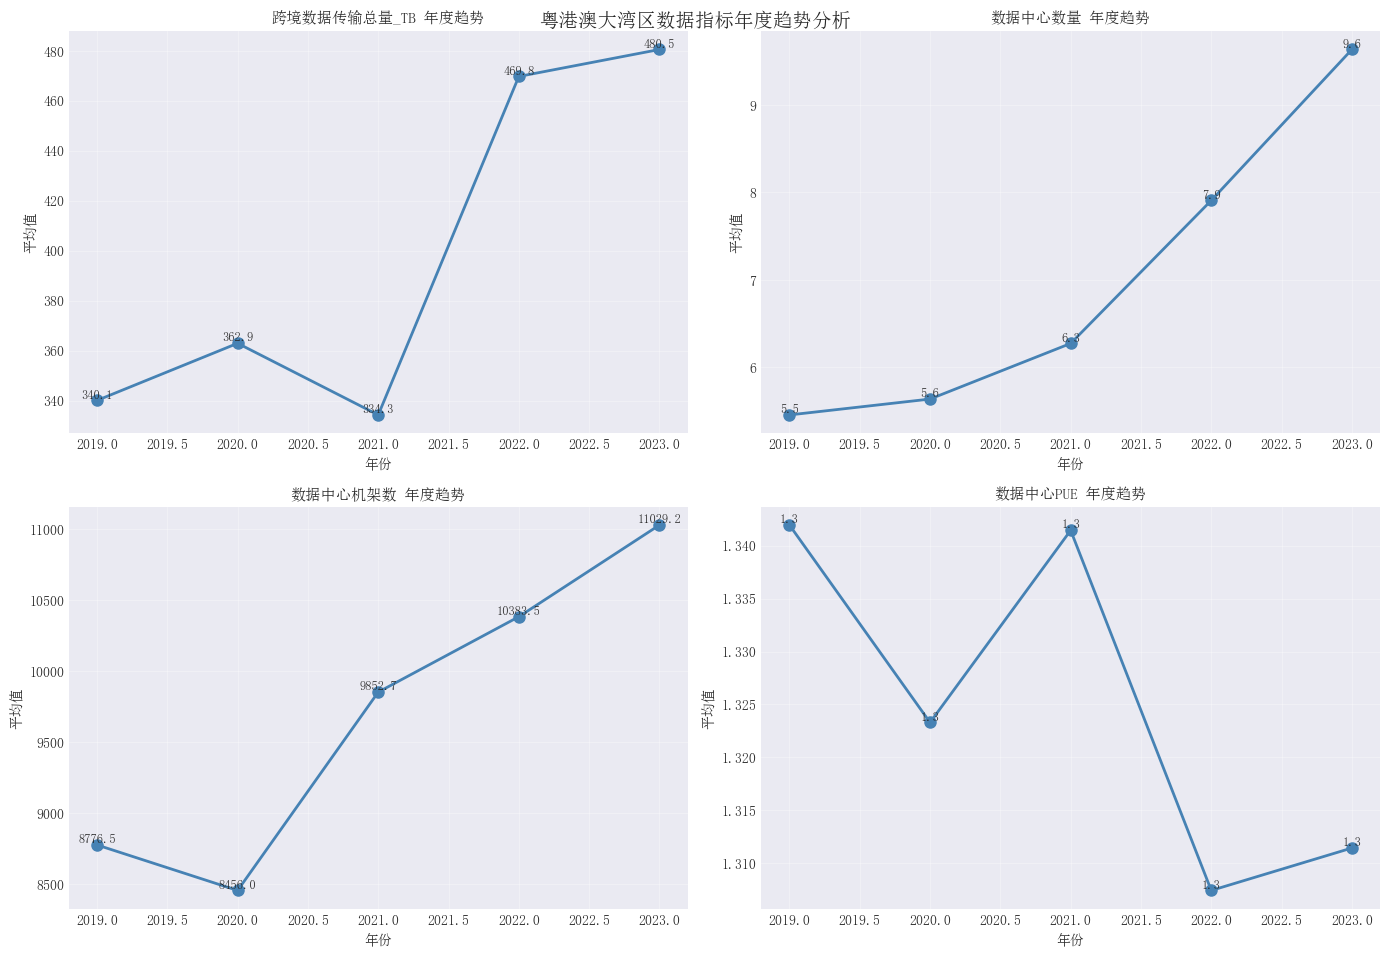


绘制数值变量分布图...


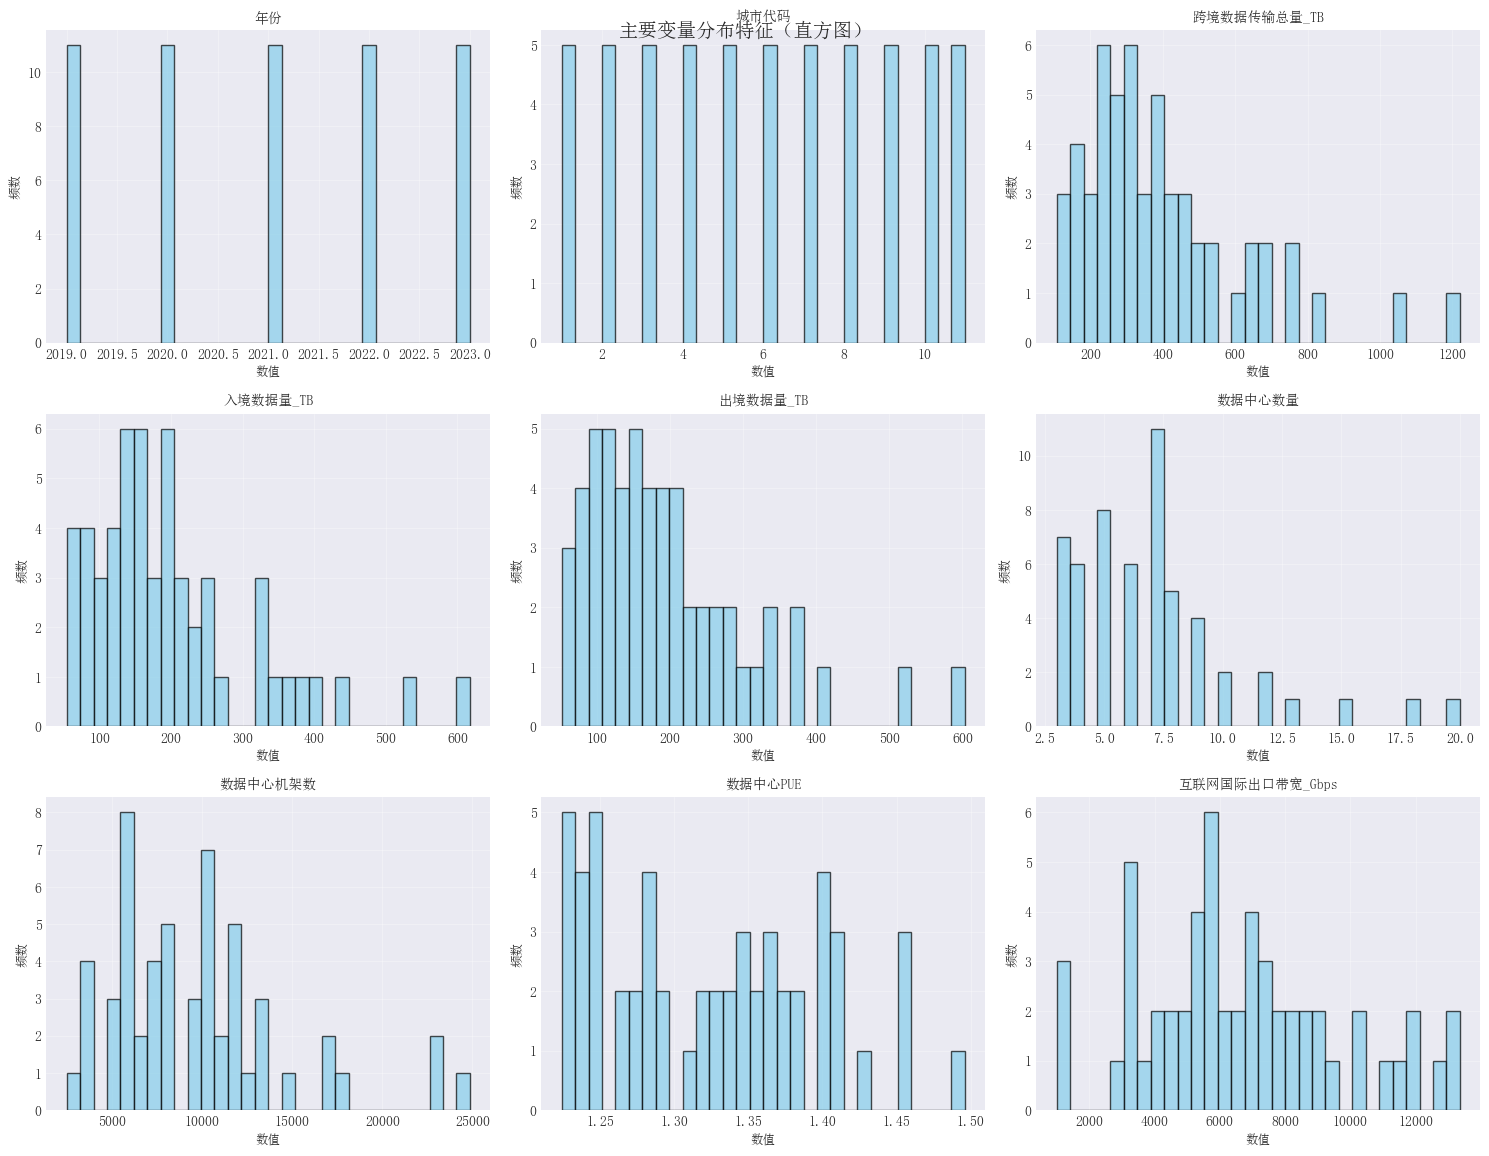

In [68]:
# ============================================
# 第六章：数据分布可视化（基于实际列名）
# ============================================

from IPython.display import HTML, display

# 隐藏下一个输出单元格的边框
display(HTML("""
<style>
    .output_png {
        background-color: transparent !important;
        border: none !important;
        padding: 0 !important;
    }
    .jp-RenderedImage {
        margin: 0 !important;
        padding: 0 !important;
        border: none !important;
    }
</style>
"""))
plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

# 6.1 先找出用于可视化的合适列名
# 找出几个可能的指标列
potential_metrics = []
for col in numeric_cols:
    if any(term in col for term in ['总量', '数量', '带宽', '频次', '项目', '机架', 'PUE']):
        potential_metrics.append(col)

print(f"找到 {len(potential_metrics)} 个潜在指标列:")
for col in potential_metrics[:15]:
    print(f"  - {col}")

# 6.2 使用找到的列进行可视化
if len(potential_metrics) >= 4:
    # 绘制前4个指标的时间趋势（如果年份列存在）
    if '年份' in main_data.columns:
        # 找出实际存在的指标列
        available_metrics = []
        for metric in potential_metrics[:4]:
            if metric in main_data.columns:
                available_metrics.append(metric)
        
        if available_metrics:
            print(f"\n使用以下指标进行年度趋势分析: {available_metrics}")
            
            # 计算年度平均值
            yearly_stats = main_data.groupby('年份')[available_metrics].mean().round(2)
            
            print("年度平均值统计:")
            print(yearly_stats)
            
            # 绘制时间趋势图
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            
            for idx, metric in enumerate(available_metrics):
                if idx < 4:  # 最多画4个子图
                    ax = axes[idx//2, idx%2]
                    yearly_metric = main_data.groupby('年份')[metric].mean()
                    ax.plot(yearly_metric.index, yearly_metric.values, 
                           marker='o', linewidth=2, markersize=8, color='steelblue')
                    # 截断过长的列名
                    short_name = metric if len(metric) <= 20 else metric[:17] + '...'
                    ax.set_title(f'{short_name} 年度趋势', fontsize=11, fontweight='bold')
                    ax.set_xlabel('年份', fontsize=10)
                    ax.set_ylabel('平均值', fontsize=10)
                    ax.grid(True, alpha=0.3)
                    
                    # 添加数据标签
                    for x, y in zip(yearly_metric.index, yearly_metric.values):
                        ax.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9)
            
            plt.suptitle('粤港澳大湾区数据指标年度趋势分析', fontsize=14, fontweight='bold', y=0.95)
            plt.tight_layout()
            plt.show()

# 6.3 绘制数值变量的分布图
print("\n绘制数值变量分布图...")
if len(numeric_cols) >= 9:
    plot_cols = numeric_cols[:9]
else:
    plot_cols = numeric_cols[:min(9, len(numeric_cols))]

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(plot_cols):
    if i < len(axes):
        # 绘制直方图
        axes[i].hist(main_data[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        short_name = col if len(col) <= 15 else col[:12] + '...'
        axes[i].set_title(f'{short_name}', fontsize=10, fontweight='bold')
        axes[i].set_xlabel('数值', fontsize=9)
        axes[i].set_ylabel('频数', fontsize=9)
        axes[i].grid(True, alpha=0.3)

plt.suptitle('主要变量分布特征（直方图）', fontsize=14, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()


🏙️ 城市间对比分析:
使用列 '城市' 作为城市标识
用于城市对比的指标: ['跨境数据传输总量_TB', '入境数据量_TB', '出境数据量_TB', '数据中心数量', '数据中心机架数', '数据中心PUE']

各城市关键指标平均值:
    跨境数据传输总量_TB  入境数据量_TB  出境数据量_TB  数据中心数量    数据中心机架数  数据中心PUE
城市                                                             
东莞     478.1800  238.8600  239.3200  9.6000 11944.4000   1.3000
中山     366.5200  187.1100  179.4100  6.0000  9766.6000   1.2800
佛山     328.3400  159.7600  168.5800  7.0000  8623.4000   1.3100
广州     816.4900  422.3900  394.1000 12.6000 16747.2000   1.4000
惠州     234.7800  119.0900  115.6900  5.4000  7567.4000   1.2800
江门     238.1500  119.4400  118.7100  5.2000  7071.6000   1.3600
深圳     439.2000  218.0000  221.2000  9.6000 14992.8000   1.3100
澳门     294.1600  146.3000  147.8700  4.2000  5702.8000   1.3300
珠海     259.2000  128.6300  130.5700  6.0000  7283.0000   1.2700
肇庆     327.3000  165.6500  161.6500  5.0000  6676.2000   1.3600
香港     590.2900  302.8300  287.4700  6.2000 10320.2000   1.3700


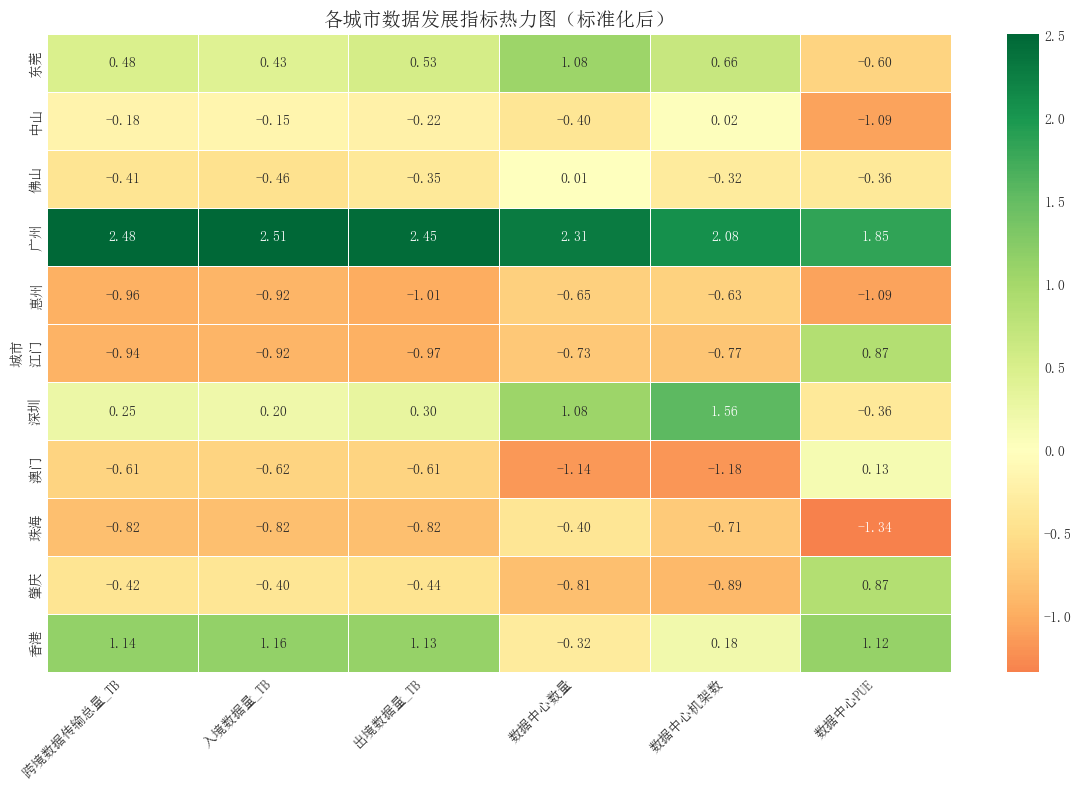

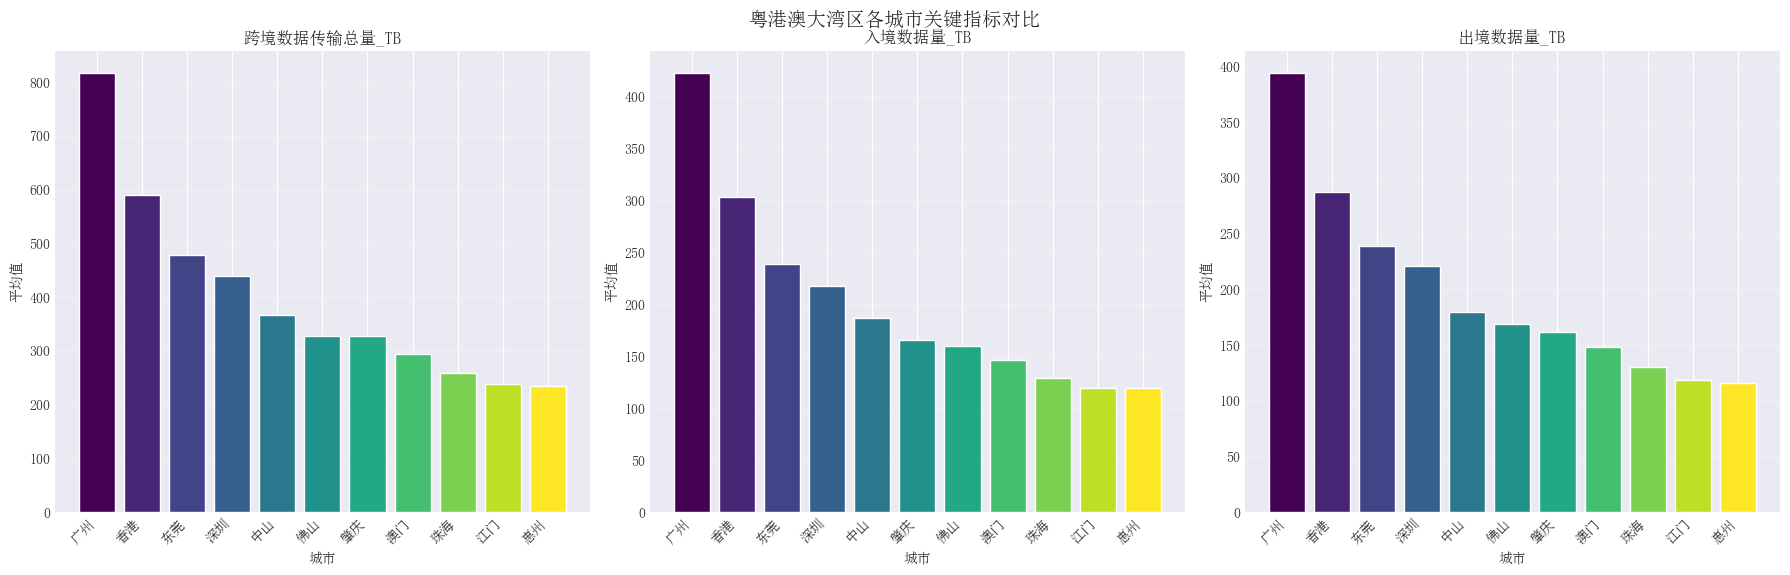

In [69]:
# ============================================
# 第七章：城市间对比分析（修正版）
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

from IPython.display import HTML, display

print("\n🏙️ 城市间对比分析:")
print("=" * 80)

# 7.1 找出城市列名（可能是'城市'或其他名称）
city_column = None
for possible_name in ['城市', 'city', 'City', '地区', '区域']:
    if possible_name in main_data.columns:
        city_column = possible_name
        break

if city_column:
    print(f"使用列 '{city_column}' 作为城市标识")
    
    # 找出可用于城市对比的数值列
    numeric_for_city_compare = []
    for col in numeric_cols:
        if col != city_column and col != '年份' and '代码' not in col:
            numeric_for_city_compare.append(col)
    
    # 选择前6个有意义的指标
    selected_metrics = numeric_for_city_compare[:6]
    print(f"用于城市对比的指标: {selected_metrics}")
    
    # 按城市计算平均值
    city_stats = main_data.groupby(city_column)[selected_metrics].mean().round(2)
    
    print("\n各城市关键指标平均值:")
    print(city_stats)
    
    # 7.2 绘制城市对比热力图
    plt.figure(figsize=(12, 8))
    # 数据标准化以便比较
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(city_stats)
    scaled_df = pd.DataFrame(scaled_data, 
                           index=city_stats.index, 
                           columns=city_stats.columns)
    
    sns.heatmap(scaled_df, cmap='RdYlGn', center=0, 
                annot=True, fmt='.2f', linewidths=0.5)
    plt.title('各城市数据发展指标热力图（标准化后）', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # 7.3 绘制城市对比柱状图（前3个指标）
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for idx, metric in enumerate(selected_metrics[:3]):
        city_metric = city_stats[metric].sort_values(ascending=False)
        axes[idx].bar(range(len(city_metric)), city_metric.values, 
                     color=plt.cm.viridis(np.linspace(0, 1, len(city_metric))))
        axes[idx].set_title(f'{metric}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('城市')
        axes[idx].set_ylabel('平均值')
        axes[idx].set_xticks(range(len(city_metric)))
        short_names = [name if len(name) <= 4 else name[:3]+'.' for name in city_metric.index]
        axes[idx].set_xticklabels(short_names, rotation=45, ha='right')
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.suptitle('粤港澳大湾区各城市关键指标对比', fontsize=14, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.show()

else:
    print("未找到城市列名，跳过城市对比分析")


🔗 OD矩阵网络分析:
1. OD矩阵总体统计:
   总记录数: 605
   包含城市数 - 起点: 11, 终点: 11
   时间跨度: 2019 - 2023

2. OD矩阵列名:
['年份', '起点城市', '终点城市', '起点代码', '终点代码', '数据传输量_TB', 'API调用频次_万次', '企业合作数据项目数']

3. 年度OD数据汇总:
        数据传输量_TB                        API调用频次_万次                          \
             sum      mean       std           sum        mean         std   
年份                                                                           
2019  76381.1400  631.2500  906.4300 22424717.9100 185328.2500 281829.2700   
2020  92677.4800  765.9300 1114.9900 28604973.6200 236404.7400 393125.1100   
2021 106552.4900  880.6000 1294.7600 31470474.8400 260086.5700 370177.2200   
2022 112623.9900  930.7800 1339.0300 31887334.3800 263531.6900 381863.7800   
2023 131255.4400 1084.7600 1723.8900 37389652.8200 309005.4000 529245.1400   

     企业合作数据项目数                  
           sum    mean     std  
年份                              
2019       754  6.2300 10.1600  
2020       950  7.8500 11.6500  
2021      1104  9.12

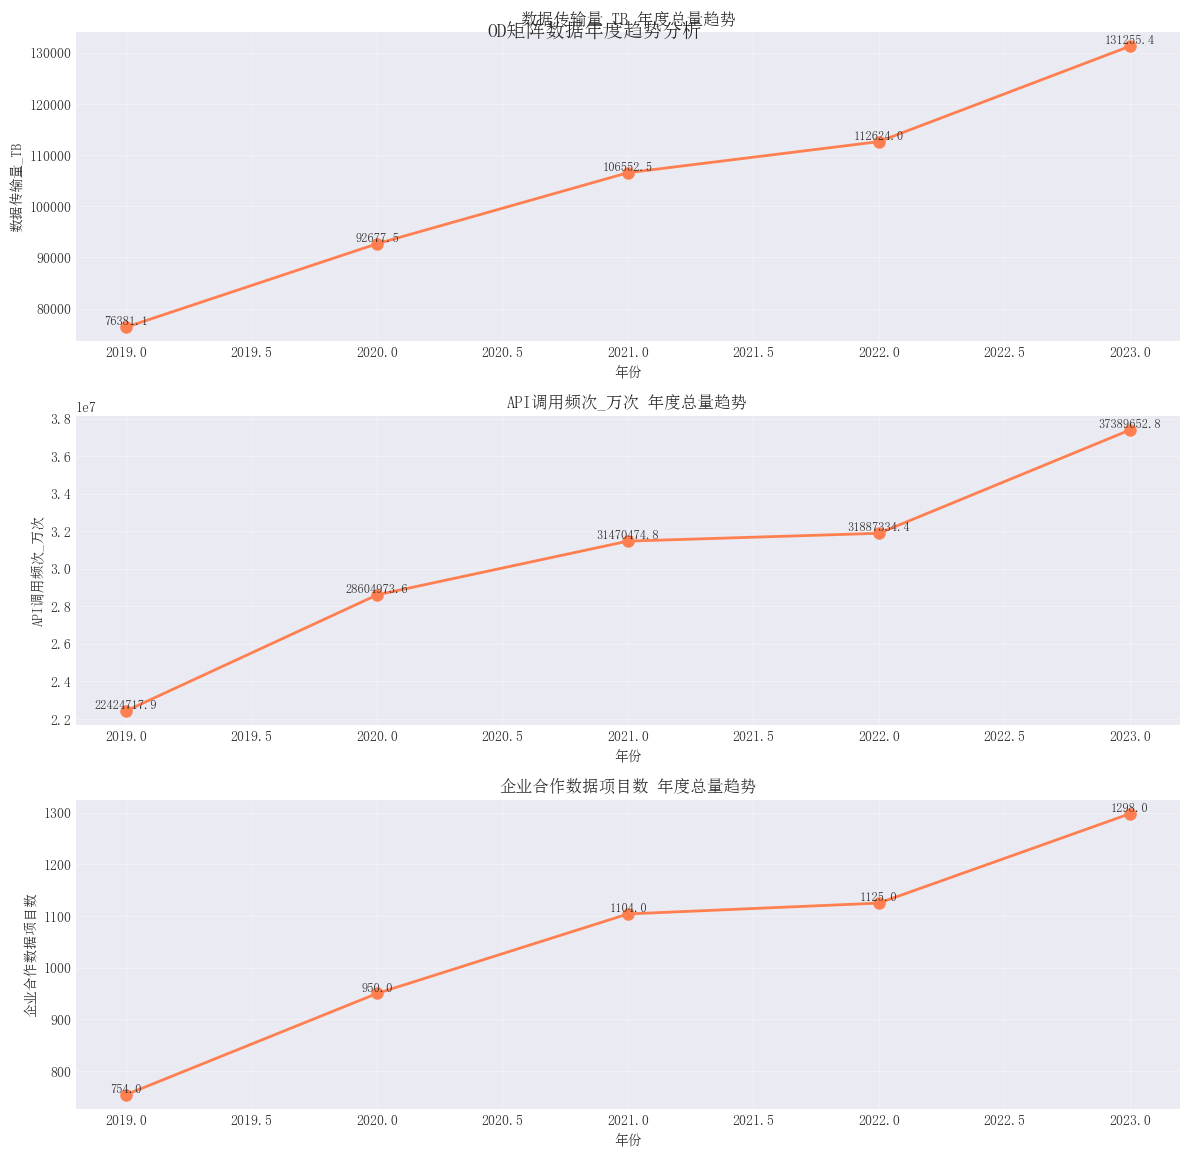


4. 城市间连接强度分析:
起点城市输出总量排名:
起点城市
香港   87161.8622
深圳   85415.0021
广州   61590.6576
佛山   51634.0691
东莞   46095.5541
珠海   38443.6876
澳门   32325.7282
中山   31937.9681
惠州   29170.6049
江门   27888.9648
Name: 数据传输量_TB, dtype: float64

终点城市输入总量排名:
终点城市
香港   89189.1372
深圳   77512.7250
广州   70885.9754
东莞   50168.0117
佛山   46781.9438
珠海   38077.4840
惠州   31252.9545
肇庆   29679.7292
澳门   29288.7390
中山   28767.9519
Name: 数据传输量_TB, dtype: float64


In [70]:
# ============================================
# 第八章：OD矩阵网络分析
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n🔗 OD矩阵网络分析:")
print("=" * 80)

if 'od_matrix' in locals():
    # 8.1 分析城市间的数据流动
    print("1. OD矩阵总体统计:")
    print(f"   总记录数: {len(od_matrix)}")
    print(f"   包含城市数 - 起点: {od_matrix['起点城市'].nunique()}, 终点: {od_matrix['终点城市'].nunique()}")
    print(f"   时间跨度: {od_matrix['年份'].min()} - {od_matrix['年份'].max()}")
    
    # 8.2 查看OD矩阵的实际列名
    print("\n2. OD矩阵列名:")
    print(od_matrix.columns.tolist())
    
    # 8.3 年度汇总统计
    print("\n3. 年度OD数据汇总:")
    # 检查哪些数值列存在
    od_numeric_cols = od_matrix.select_dtypes(include=[np.number]).columns.tolist()
    od_numeric_cols = [col for col in od_numeric_cols if col not in ['年份', '起点代码', '终点代码']]
    
    if od_numeric_cols:
        yearly_od_summary = od_matrix.groupby('年份')[od_numeric_cols].agg(['sum', 'mean', 'std']).round(2)
        print(yearly_od_summary)
        
        # 8.4 绘制年度趋势
        fig, axes = plt.subplots(len(od_numeric_cols), 1, figsize=(12, 4*len(od_numeric_cols)))
        if len(od_numeric_cols) == 1:
            axes = [axes]
        
        for idx, col in enumerate(od_numeric_cols):
            yearly_data = od_matrix.groupby('年份')[col].sum()
            axes[idx].plot(yearly_data.index, yearly_data.values, 
                         marker='o', linewidth=2, markersize=8, color='coral')
            axes[idx].set_title(f'{col} 年度总量趋势', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel('年份', fontsize=10)
            axes[idx].set_ylabel(col, fontsize=10)
            axes[idx].grid(True, alpha=0.3)
            
            # 添加数据标签
            for x, y in zip(yearly_data.index, yearly_data.values):
                axes[idx].text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9)
        
        plt.suptitle('OD矩阵数据年度趋势分析', fontsize=14, fontweight='bold', y=0.95)
        plt.tight_layout()
        plt.show()
    
    # 8.5 分析城市间的连接强度
    print("\n4. 城市间连接强度分析:")
    # 计算每个起点城市的总输出量
    city_outflow = od_matrix.groupby('起点城市')['数据传输量_TB'].sum().sort_values(ascending=False)
    print("起点城市输出总量排名:")
    print(city_outflow.head(10))
    
    # 计算每个终点城市的总输入量
    city_inflow = od_matrix.groupby('终点城市')['数据传输量_TB'].sum().sort_values(ascending=False)
    print("\n终点城市输入总量排名:")
    print(city_inflow.head(10))

🔗 多维度相关性分析
用于相关性分析的关键变量 (11个):
  - 跨境数据传输总量_TB
  - 数据中心数量
  - 数据中心机架数
  - 互联网国际出口带宽_Gbps
  - GDP_亿元
  - 数字经济核心产业增加值_亿元
  - 上市公司数量
  - 研发经费投入_亿元
  - 科技人才数量_万人
  - 5G基站数量
  - 智慧城市发展指数


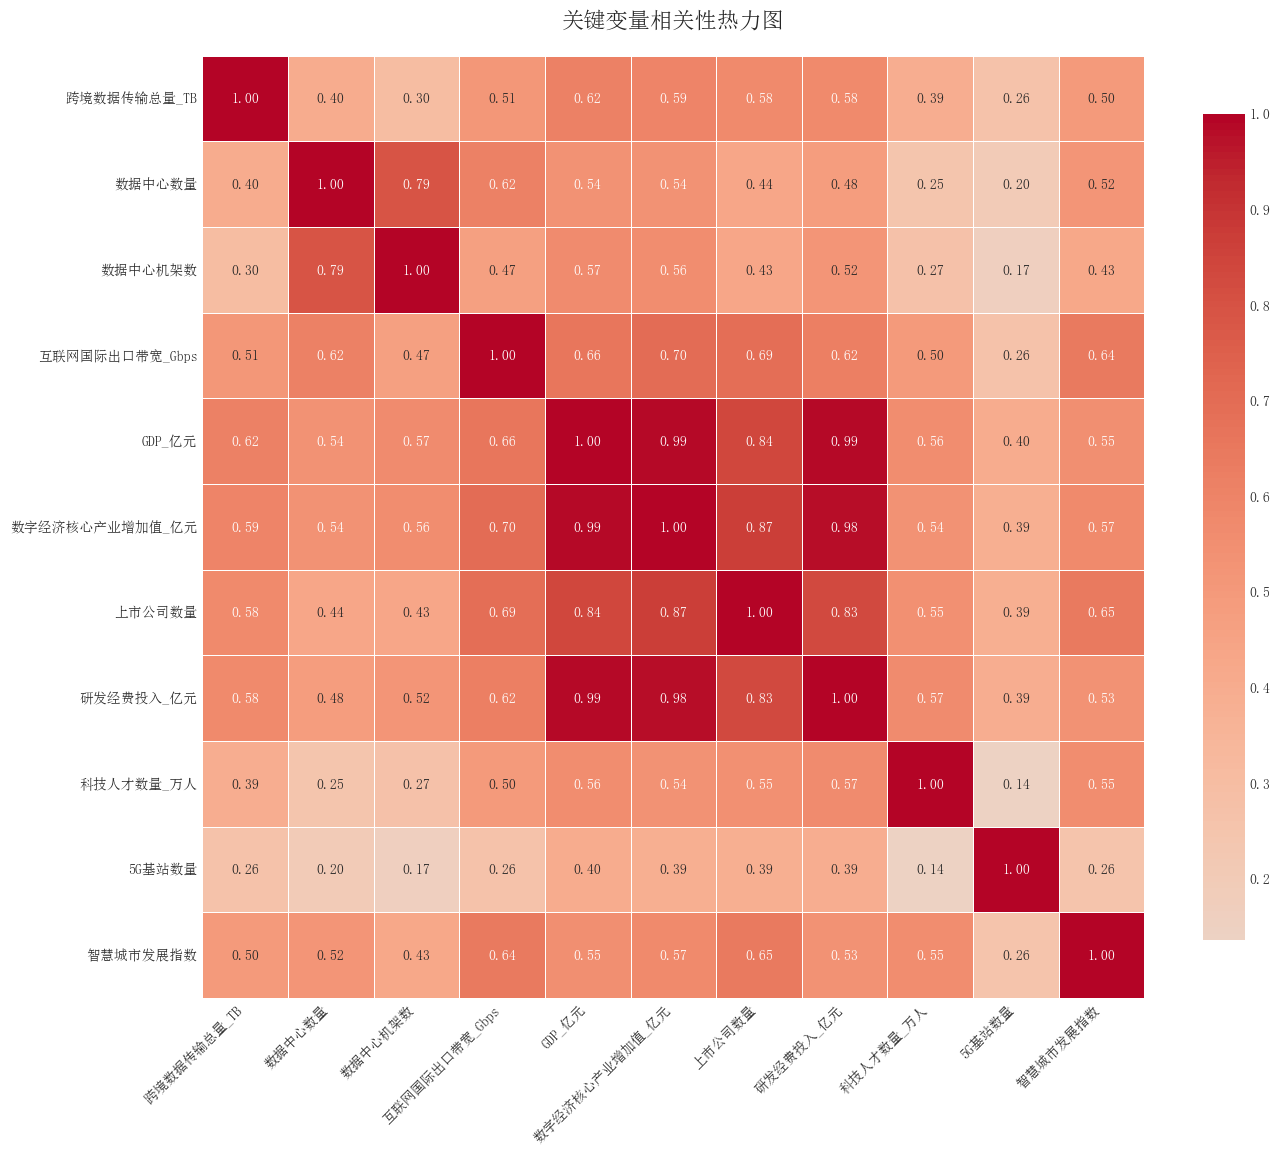


强相关性关系 (|r| > 0.7):
  GDP_亿元 ↔ 研发经费投入_亿元: 0.987
  GDP_亿元 ↔ 数字经济核心产业增加值_亿元: 0.987
  数字经济核心产业增加值_亿元 ↔ 研发经费投入_亿元: 0.980
  数字经济核心产业增加值_亿元 ↔ 上市公司数量: 0.871
  GDP_亿元 ↔ 上市公司数量: 0.838
  上市公司数量 ↔ 研发经费投入_亿元: 0.830
  数据中心数量 ↔ 数据中心机架数: 0.795

绘制主要相关性散点图...


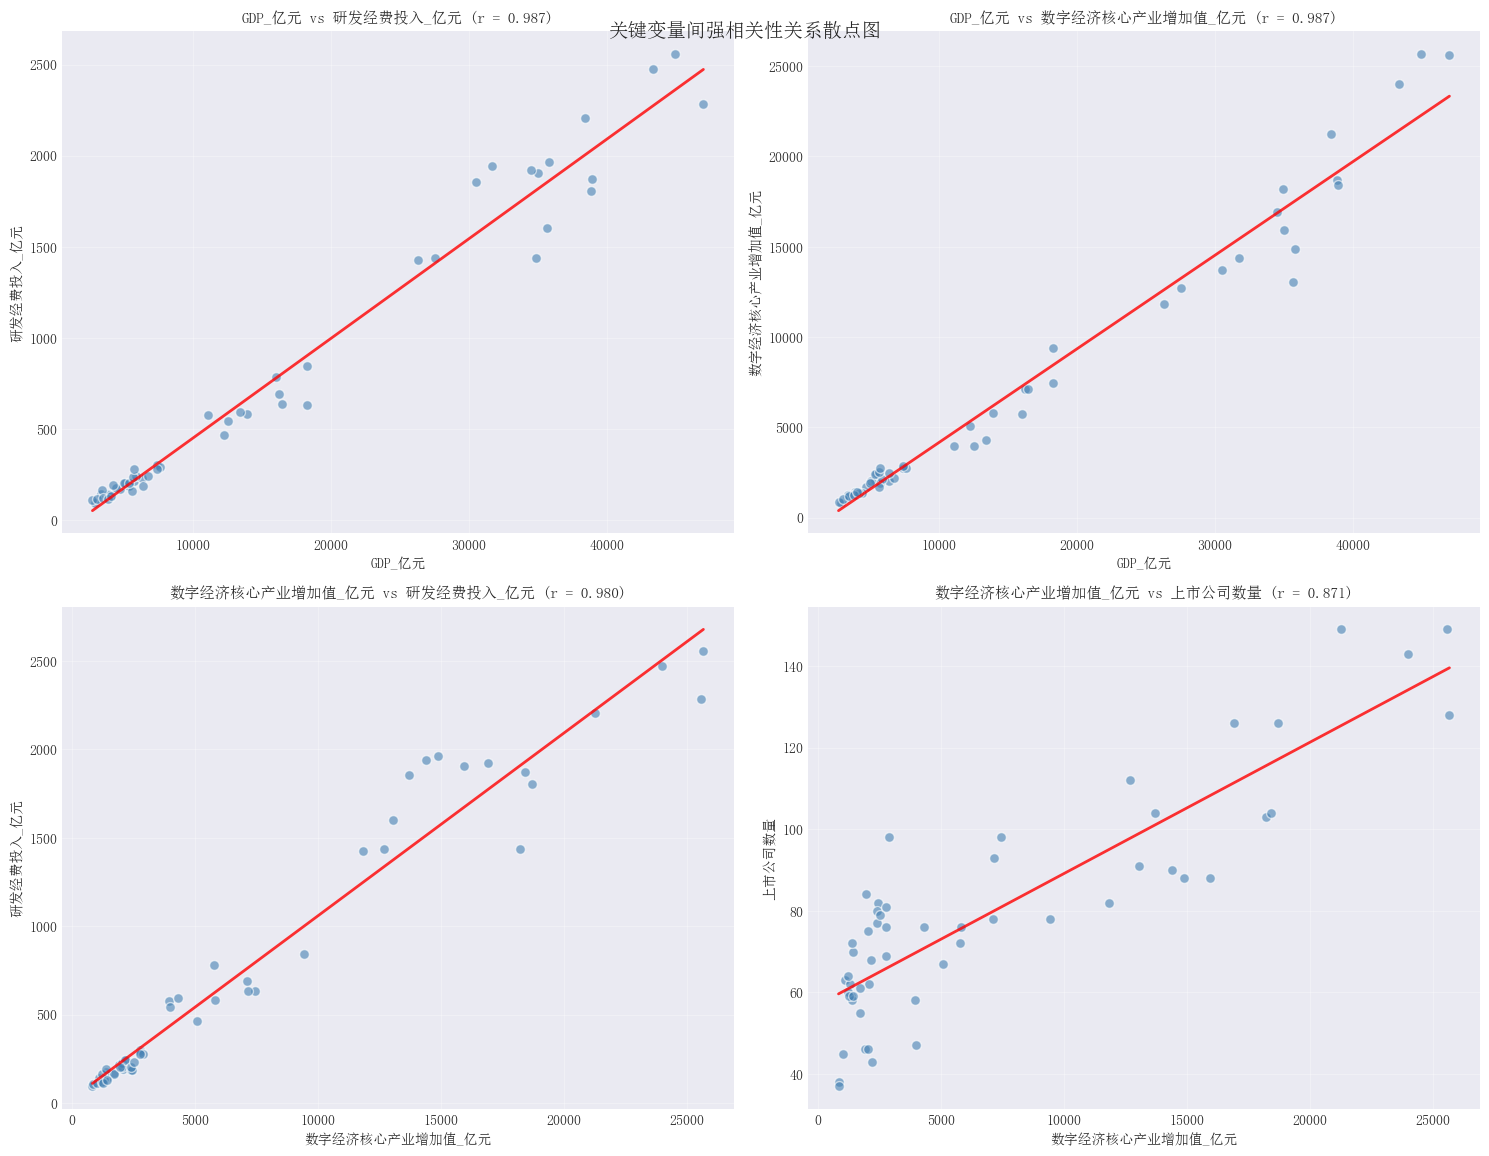

In [71]:
# ============================================
# 第九章：多维度相关性分析
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("🔗 多维度相关性分析")
print("=" * 80)

# 9.1 选择关键变量进行相关性分析
key_variables = [
    '跨境数据传输总量_TB', '数据中心数量', '数据中心机架数',
    '互联网国际出口带宽_Gbps', 'GDP_亿元', '数字经济核心产业增加值_亿元',
    '上市公司数量', '研发经费投入_亿元', '科技人才数量_万人',
    '5G基站数量', '智慧城市发展指数'
]

# 检查这些变量是否都存在
available_keys = [col for col in key_variables if col in main_data.columns]
print(f"用于相关性分析的关键变量 ({len(available_keys)}个):")
for col in available_keys:
    print(f"  - {col}")

# 9.2 计算相关系数矩阵
correlation_matrix = main_data[available_keys].corr()

# 9.3 绘制热力图
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, 
           annot=True, 
           fmt='.2f', 
           cmap='coolwarm',
           center=0,
           square=True,
           linewidths=0.5,
           cbar_kws={"shrink": 0.8})
plt.title('关键变量相关性热力图', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 9.4 识别强相关性关系
print("\n强相关性关系 (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            var1 = correlation_matrix.columns[i]
            var2 = correlation_matrix.columns[j]
            strong_correlations.append((var1, var2, corr_value))

# 按相关性强度排序
strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

for var1, var2, corr in strong_correlations:
    print(f"  {var1} ↔ {var2}: {corr:.3f}")

# 9.5 绘制最重要的相关性散点图
print("\n绘制主要相关性散点图...")
if len(strong_correlations) >= 4:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.ravel()
    
    for idx, (var1, var2, corr) in enumerate(strong_correlations[:4]):
        axes[idx].scatter(main_data[var1], main_data[var2], 
                         alpha=0.6, s=50, color='steelblue', edgecolor='white')
        axes[idx].set_xlabel(var1, fontsize=10)
        axes[idx].set_ylabel(var2, fontsize=10)
        axes[idx].set_title(f'{var1} vs {var2} (r = {corr:.3f})', 
                           fontsize=11, fontweight='bold')
        axes[idx].grid(True, alpha=0.3)
        
        # 添加回归线
        from scipy.stats import linregress
        slope, intercept, r_value, p_value, std_err = linregress(main_data[var1], main_data[var2])
        x_range = np.linspace(main_data[var1].min(), main_data[var1].max(), 100)
        axes[idx].plot(x_range, intercept + slope*x_range, 
                      'r-', linewidth=2, alpha=0.8)
    
    plt.suptitle('关键变量间强相关性关系散点图', fontsize=14, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.savefig('correlation_scatter.png', dpi=300, bbox_inches='tight')
    plt.show()


🎯 主成分分析（PCA）降维


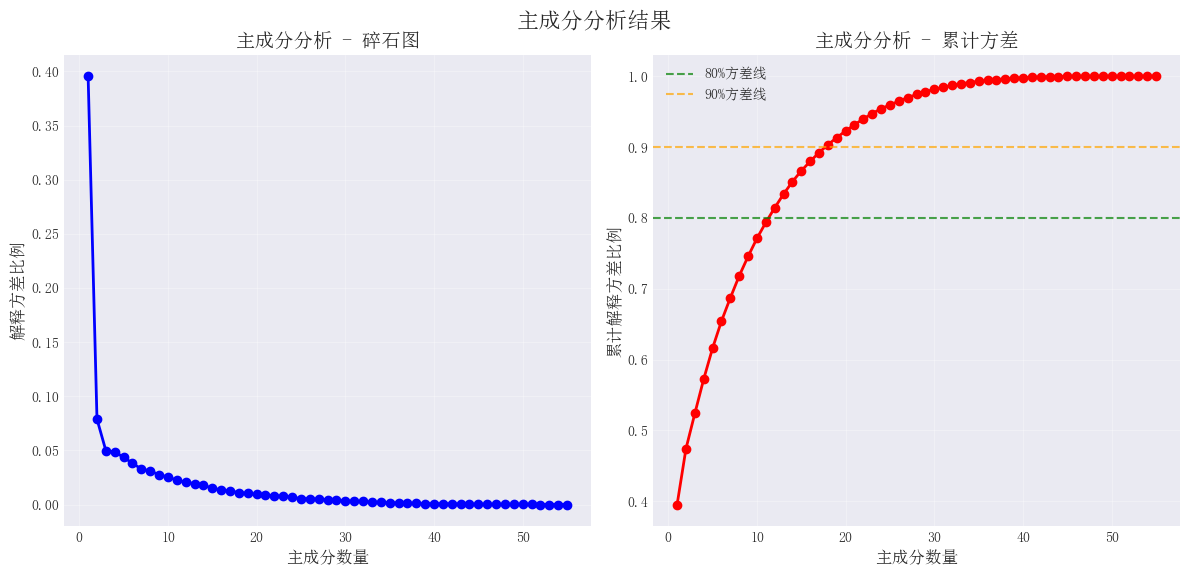

总变量数: 55
前5个主成分的解释方差比例:
  主成分 1: 0.3955 (39.55%)
  主成分 2: 0.0788 (7.88%)
  主成分 3: 0.0498 (4.98%)
  主成分 4: 0.0485 (4.85%)
  主成分 5: 0.0437 (4.37%)

达到80%方差需要的主成分数: 12
达到90%方差需要的主成分数: 18

第一主成分的变量载荷（前10个绝对值最大的）:
                变量     载荷    绝对值
25  数字经济核心产业增加值_亿元 0.1980 0.1980
26    数字经济占GDP比重_% 0.1948 0.1948
22          GDP_亿元 0.1933 0.1933
33          上市公司数量 0.1911 0.1911
34       研发经费投入_亿元 0.1870 0.1870
28      外贸进出口总额_亿元 0.1861 0.1861
19       数据安全认证企业数 0.1841 0.1841
6   互联网国际出口带宽_Gbps 0.1788 0.1788
17       数据资产登记数_个 0.1765 0.1765
21       个人信息保护投诉量 0.1730 0.1730


In [72]:
# ============================================
# 第十章：主成分分析（PCA）
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n🎯 主成分分析（PCA）降维")
print("=" * 80)

# 10.1 数据标准化
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 选择所有数值型变量进行PCA（排除分类变量）
pca_features = [col for col in numeric_cols if col not in ['年份', '城市代码']]
X = main_data[pca_features]

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 10.2 进行PCA分析
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 10.3 计算解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# 10.4 绘制碎石图
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 
         'bo-', linewidth=2, markersize=6)
plt.xlabel('主成分数量', fontsize=12)
plt.ylabel('解释方差比例', fontsize=12)
plt.title('主成分分析 - 碎石图', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
         'ro-', linewidth=2, markersize=6)
plt.xlabel('主成分数量', fontsize=12)
plt.ylabel('累计解释方差比例', fontsize=12)
plt.title('主成分分析 - 累计方差', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.8, color='g', linestyle='--', alpha=0.7, label='80%方差线')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90%方差线')
plt.legend()

plt.suptitle('主成分分析结果', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

# 10.5 查看前几个主成分的贡献
print(f"总变量数: {len(pca_features)}")
print(f"前5个主成分的解释方差比例:")
for i in range(5):
    print(f"  主成分 {i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")

# 找出达到80%和90%方差所需的主成分数
n_components_80 = np.where(cumulative_variance >= 0.8)[0][0] + 1
n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1
print(f"\n达到80%方差需要的主成分数: {n_components_80}")
print(f"达到90%方差需要的主成分数: {n_components_90}")

# 10.6 查看主成分的变量载荷
print("\n第一主成分的变量载荷（前10个绝对值最大的）:")
pc1_loadings = pd.DataFrame({
    '变量': pca_features,
    '载荷': pca.components_[0]
})
pc1_loadings['绝对值'] = np.abs(pc1_loadings['载荷'])
print(pc1_loadings.sort_values('绝对值', ascending=False).head(10))

In [53]:
# ============================================
# 第十一章：聚类分析准备
# ============================================

print("\n📊 聚类分析准备 - 特征工程")
print("=" * 80)

# 11.1 选择用于聚类的特征
# 基于相关性分析和专业知识选择关键特征
clustering_features = [
    '跨境数据传输总量_TB',
    '数据中心数量',
    '数据中心机架数',
    '互联网国际出口带宽_Gbps',
    'GDP_亿元',
    '数字经济核心产业增加值_亿元',
    '上市公司数量',
    '研发经费投入_亿元',
    '科技人才数量_万人',
    '5G基站数量',
    '智慧城市发展指数'
]

# 确保所有特征都存在
clustering_features = [col for col in clustering_features if col in main_data.columns]
print(f"用于聚类的特征 ({len(clustering_features)}个):")
for col in clustering_features:
    print(f"  - {col}")

# 11.2 提取聚类数据
cluster_data = main_data[clustering_features].copy()

# 11.3 数据标准化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)
cluster_data_scaled_df = pd.DataFrame(cluster_data_scaled, columns=clustering_features)

print("\n标准化后数据描述:")
print(pd.DataFrame(cluster_data_scaled_df.describe().round(3)))

# 11.4 计算距离矩阵
from scipy.spatial.distance import pdist, squareform

distance_matrix = pdist(cluster_data_scaled_df, metric='euclidean')
distance_square = squareform(distance_matrix)

print(f"\n距离矩阵形状: {distance_square.shape}")
print(f"最小距离: {distance_square.min():.3f}, 最大距离: {distance_square.max():.3f}")


📊 聚类分析准备 - 特征工程
用于聚类的特征 (11个):
  - 跨境数据传输总量_TB
  - 数据中心数量
  - 数据中心机架数
  - 互联网国际出口带宽_Gbps
  - GDP_亿元
  - 数字经济核心产业增加值_亿元
  - 上市公司数量
  - 研发经费投入_亿元
  - 科技人才数量_万人
  - 5G基站数量
  - 智慧城市发展指数

标准化后数据描述:
       跨境数据传输总量_TB  数据中心数量  数据中心机架数  互联网国际出口带宽_Gbps  GDP_亿元  数字经济核心产业增加值_亿元  \
count      55.0000 55.0000  55.0000         55.0000 55.0000         55.0000   
mean       -0.0000  0.0000  -0.0000         -0.0000 -0.0000          0.0000   
std         1.0090  1.0090   1.0090          1.0090  1.0090          1.0090   
min        -1.2800 -1.1300  -1.4920         -1.8830 -0.9140         -0.8410   
25%        -0.6600 -0.5620  -0.7850         -0.6260 -0.7600         -0.7200   
50%        -0.1710  0.0050  -0.0240         -0.1350 -0.5720         -0.5710   
75%         0.3500  0.2890   0.4360          0.5800  0.8460          0.7430   
max         3.6200  3.6940   3.1280          2.2150  2.3070          2.6000   

       上市公司数量  研发经费投入_亿元  科技人才数量_万人  5G基站数量  智慧城市发展指数  
count 55.0000    55.0000    55.0000 55


🎯 K-means聚类分析
正在寻找最佳聚类数...


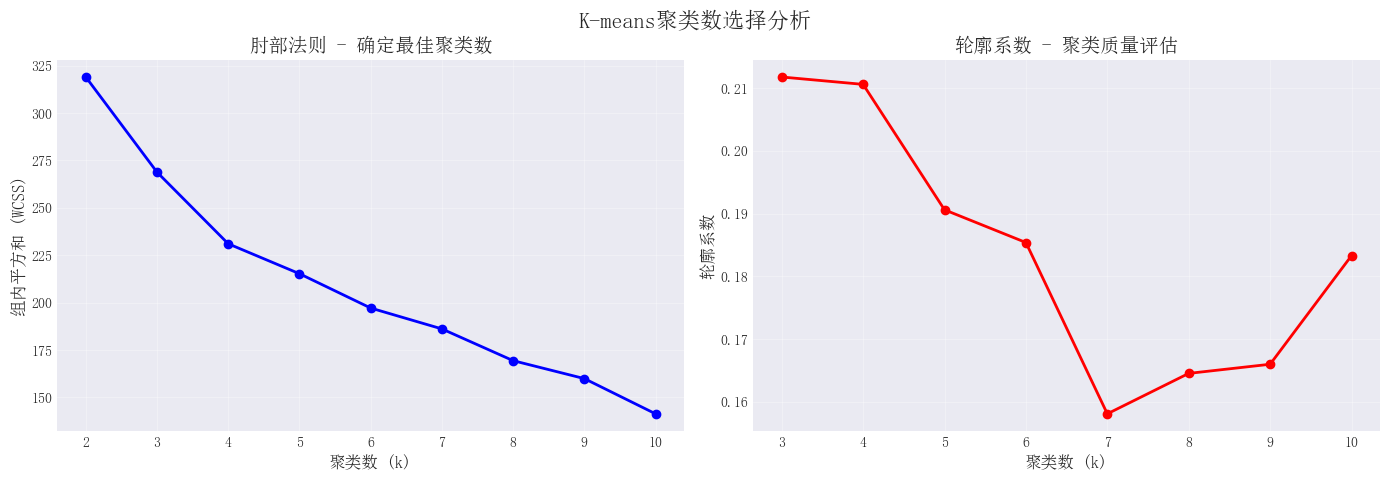


聚类评估指标:
k=2: 轮廓系数=0.4433, Calinski-Harabasz=47.51, Davies-Bouldin=0.9831
k=3: 轮廓系数=0.2118, Calinski-Harabasz=32.51, Davies-Bouldin=1.3763
k=4: 轮廓系数=0.2106, Calinski-Harabasz=27.52, Davies-Bouldin=1.5294
k=5: 轮廓系数=0.1906, Calinski-Harabasz=22.63, Davies-Bouldin=1.5777
k=6: 轮廓系数=0.1854, Calinski-Harabasz=20.27, Davies-Bouldin=1.2945
k=7: 轮廓系数=0.1581, Calinski-Harabasz=18.00, Davies-Bouldin=1.4902
k=8: 轮廓系数=0.1646, Calinski-Harabasz=17.27, Davies-Bouldin=1.3731
k=9: 轮廓系数=0.1660, Calinski-Harabasz=16.00, Davies-Bouldin=1.4573
k=10: 轮廓系数=0.1833, Calinski-Harabasz=16.40, Davies-Bouldin=1.2033

建议的最佳聚类数 (基于轮廓系数): 3

聚类完成！数据被分为 3 个簇
各簇的样本数量:
cluster_label
0    21
1    16
2    18
Name: count, dtype: int64


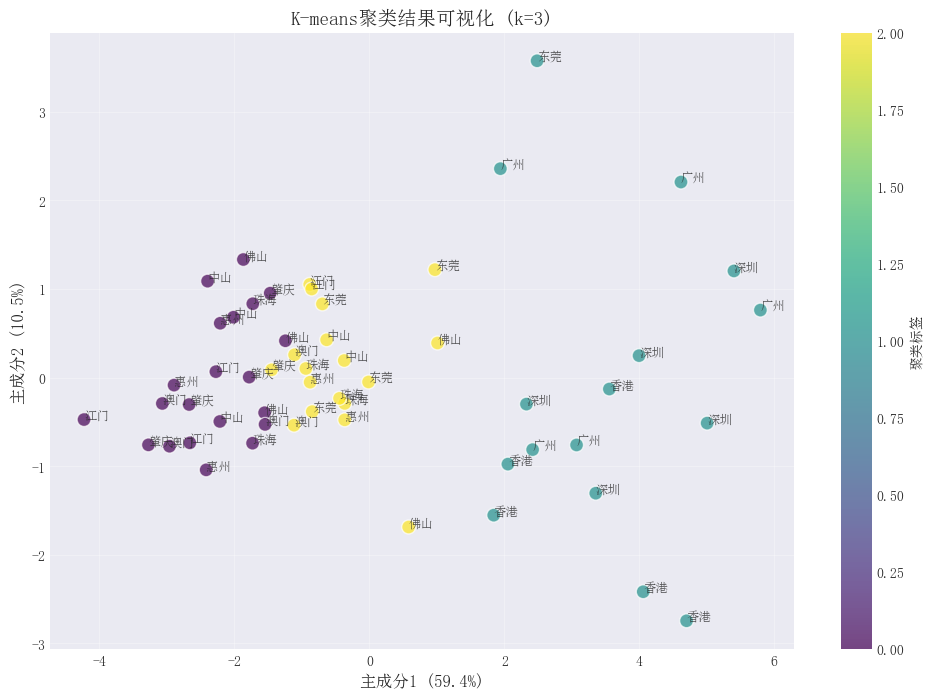


各簇特征分析:
               跨境数据传输总量_TB  数据中心数量    数据中心机架数  互联网国际出口带宽_Gbps     GDP_亿元  \
cluster_label                                                              
0                 256.6630  4.8100  7126.9520       4179.2990  5658.7140   
1                 604.2450 10.1250 14212.5620       9456.4510 35118.0770   
2                 378.0690  6.7220  8689.5000       7123.1490  8851.1440   

               数字经济核心产业增加值_亿元   上市公司数量  研发经费投入_亿元  科技人才数量_万人     5G基站数量  \
cluster_label                                                             
0                   1886.2380  57.9520   226.7510    25.8950 15142.0480   
1                  17167.3830 110.0620  1846.2980    67.4150 23162.3750   
2                   3614.7450  76.4440   350.4580    45.2330 18515.8330   

               智慧城市发展指数  
cluster_label            
0               76.2550  
1               92.8110  
2               89.4520  


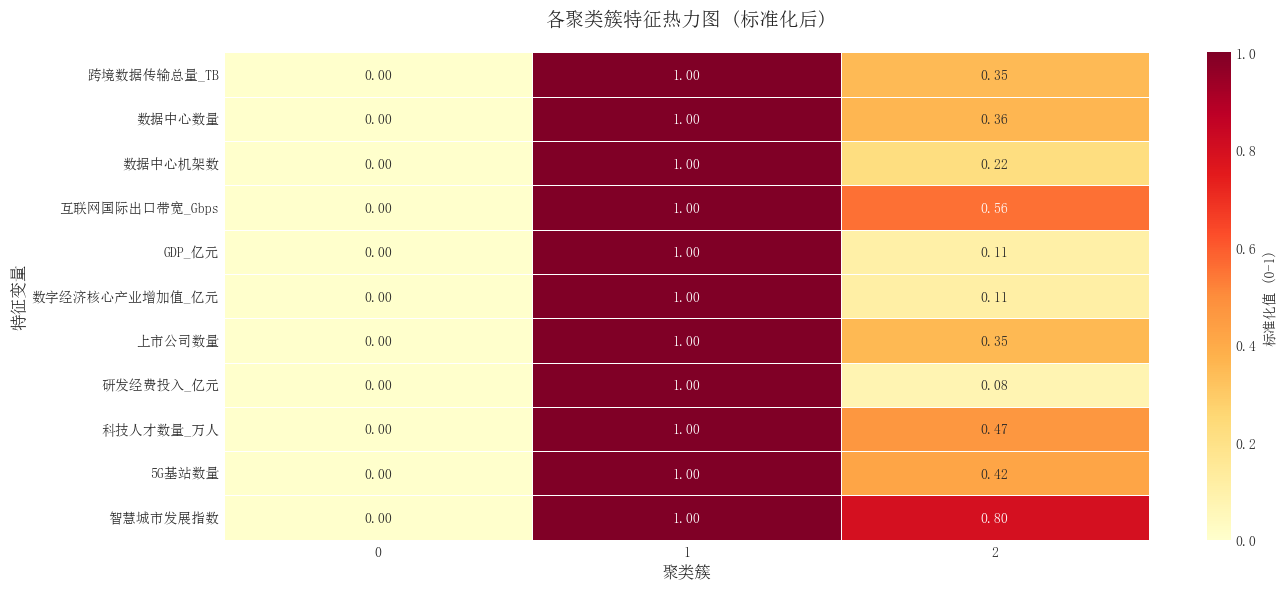

In [73]:
# ============================================
# 第十二章：K-means聚类分析（修正版）
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n🎯 K-means聚类分析")
print("=" * 80)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 12.1 确定最佳聚类数（肘部法则）
print("正在寻找最佳聚类数...")
wcss = []  # 组内平方和
silhouette_scores = []
k_range = range(2, 11)  # 测试2-10个聚类

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled_df)
    wcss.append(kmeans.inertia_)
    
    # 计算轮廓系数（仅在k>1时）
    if k > 1:
        silhouette_avg = silhouette_score(cluster_data_scaled_df, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# 12.2 绘制肘部法则图
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 肘部图
axes[0].plot(k_range, wcss, 'bo-', linewidth=2, markersize=6)
axes[0].set_xlabel('聚类数 (k)', fontsize=12)
axes[0].set_ylabel('组内平方和 (WCSS)', fontsize=12)  # 修正这里
axes[0].set_title('肘部法则 - 确定最佳聚类数', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 轮廓系数图
axes[1].plot(k_range[1:], silhouette_scores[1:], 'ro-', linewidth=2, markersize=6)
axes[1].set_xlabel('聚类数 (k)', fontsize=12)
axes[1].set_ylabel('轮廓系数', fontsize=12)
axes[1].set_title('轮廓系数 - 聚类质量评估', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('K-means聚类数选择分析', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig('optimal_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

# 12.3 计算其他评估指标
print("\n聚类评估指标:")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(cluster_data_scaled_df)
    
    if k > 1:
        silhouette = silhouette_score(cluster_data_scaled_df, labels)
        calinski = calinski_harabasz_score(cluster_data_scaled_df, labels)
        davies = davies_bouldin_score(cluster_data_scaled_df, labels)
        
        print(f"k={k}: 轮廓系数={silhouette:.4f}, Calinski-Harabasz={calinski:.2f}, Davies-Bouldin={davies:.4f}")

# 12.4 选择最佳k值（这里以轮廓系数最大为准则）
optimal_k = k_range[np.argmax(silhouette_scores[1:]) + 1]
print(f"\n建议的最佳聚类数 (基于轮廓系数): {optimal_k}")

# 12.5 使用最佳k值进行最终聚类
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
main_data['cluster_label'] = final_kmeans.fit_predict(cluster_data_scaled_df)

print(f"\n聚类完成！数据被分为 {optimal_k} 个簇")
print("各簇的样本数量:")
print(main_data['cluster_label'].value_counts().sort_index())

# 12.6 可视化聚类结果（使用前两个主成分）
# 进行PCA降维到2维以便可视化
pca_2d = PCA(n_components=2)
cluster_pca = pca_2d.fit_transform(cluster_data_scaled_df)

# 创建可视化数据框
cluster_viz_df = pd.DataFrame({
    'PC1': cluster_pca[:, 0],
    'PC2': cluster_pca[:, 1],
    'Cluster': main_data['cluster_label'],
    'City': main_data['城市']
})

plt.figure(figsize=(12, 8))
scatter = plt.scatter(cluster_viz_df['PC1'], cluster_viz_df['PC2'], 
                     c=cluster_viz_df['Cluster'], 
                     cmap='viridis',
                     s=100,
                     alpha=0.7,
                     edgecolors='white',
                     linewidth=1)

# 添加城市标签
for i, row in cluster_viz_df.iterrows():
    plt.annotate(row['City'], 
                (row['PC1'], row['PC2']),
                fontsize=9,
                alpha=0.8)

plt.xlabel(f'主成分1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'主成分2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title(f'K-means聚类结果可视化 (k={optimal_k})', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='聚类标签')
plt.grid(True, alpha=0.3)
plt.savefig(f'kmeans_clustering_k{optimal_k}.png', dpi=300, bbox_inches='tight')
plt.show()

# 12.7 分析各簇特征
print("\n各簇特征分析:")
cluster_summary = main_data.groupby('cluster_label')[clustering_features].mean().round(3)
print(cluster_summary)

# 12.8 标准化簇特征热力图
# 标准化每个簇的特征值以便比较
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()
cluster_summary_scaled = pd.DataFrame(
    scaler_mm.fit_transform(cluster_summary),
    index=cluster_summary.index,
    columns=cluster_summary.columns
)

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_summary_scaled.T, 
           annot=True, 
           fmt='.2f',
           cmap='YlOrRd',
           center=0.5,
           linewidths=0.5,
           cbar_kws={'label': '标准化值 (0-1)'})
plt.title('各聚类簇特征热力图 (标准化后)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('聚类簇', fontsize=12)
plt.ylabel('特征变量', fontsize=12)
plt.tight_layout()
plt.savefig('cluster_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


🌳 层次聚类分析
计算距离矩阵...
  ward方法连接矩阵计算完成
  complete方法连接矩阵计算完成
  average方法连接矩阵计算完成
  single方法连接矩阵计算完成


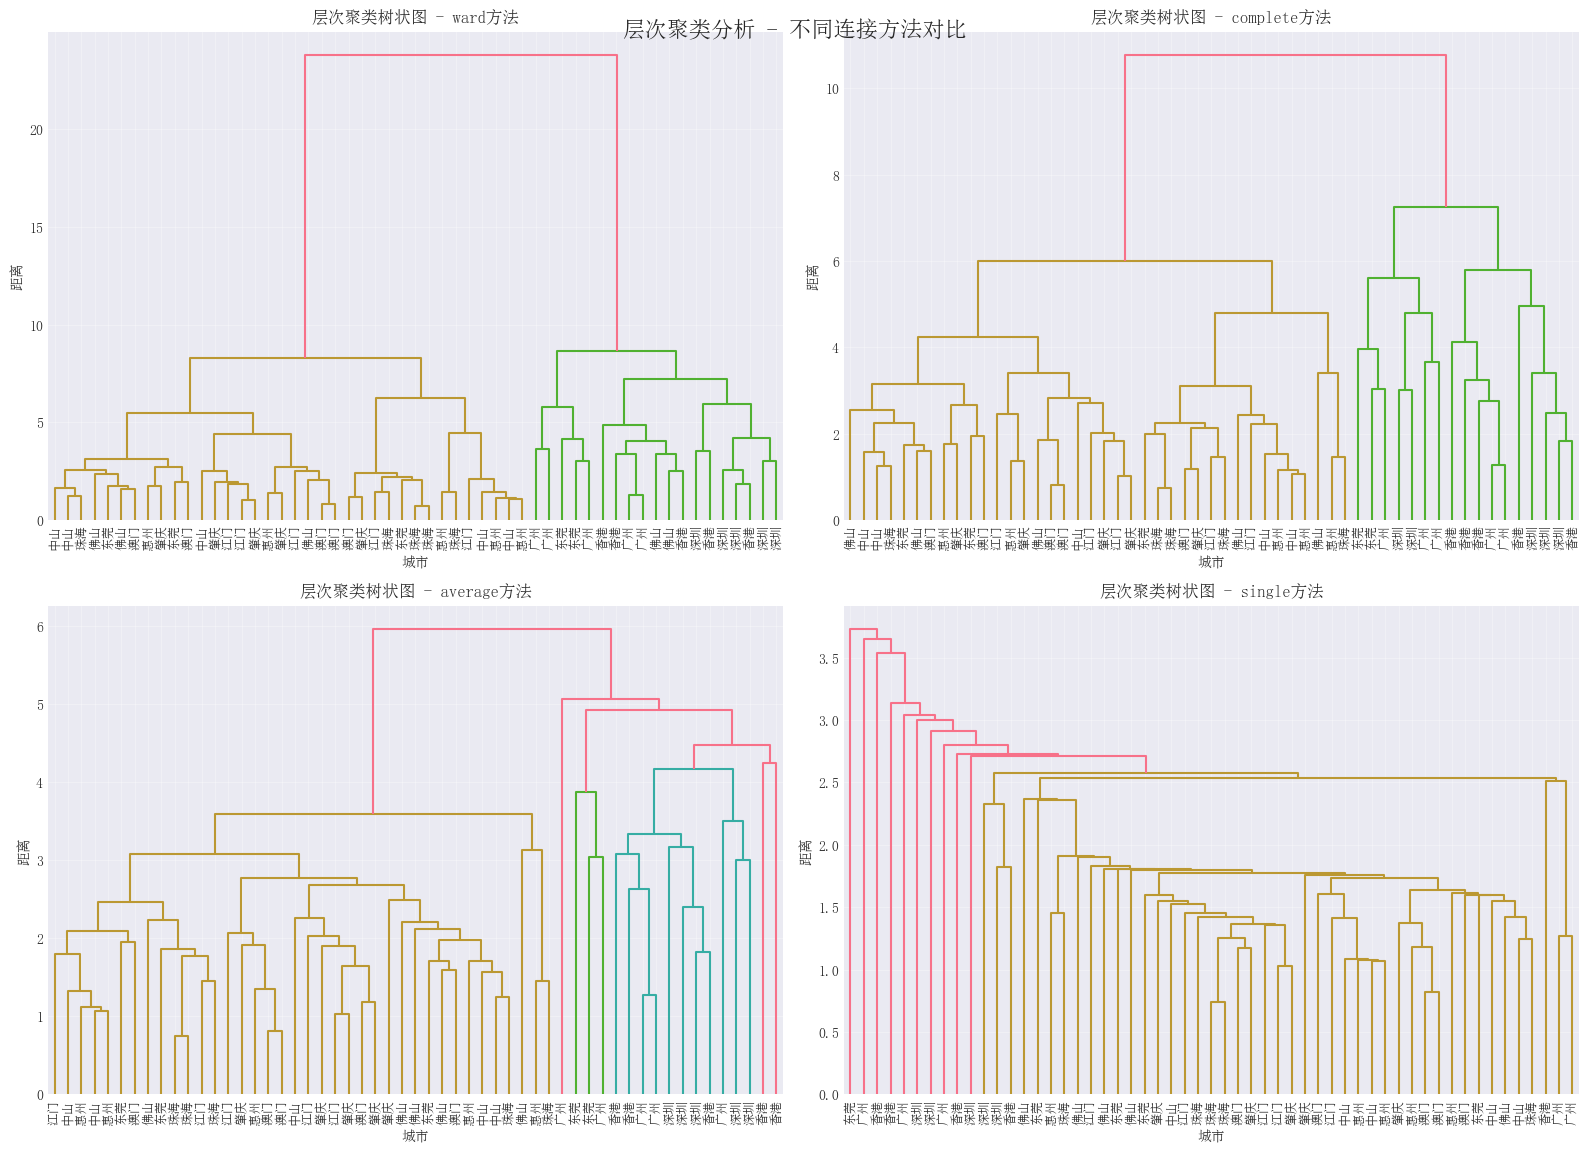


使用ward方法进行层次聚类...
层次聚类结果 (ward方法，切割高度=15):
各簇样本数量:
ward_cluster
1    36
2    19
Name: count, dtype: int64

聚类方法对比:
K-means聚类 vs 层次聚类 (ward):
   城市    年份  K-means聚类  层次聚类
0  东莞  2019          2     1
1  东莞  2020          2     1
2  东莞  2021          2     1
3  东莞  2022          2     2
4  东莞  2023          1     2
5  中山  2019          0     1
6  中山  2020          0     1
7  中山  2021          0     1
8  中山  2022          2     1
9  中山  2023          2     1

聚类一致性评估:
调整兰德指数 (ARI): 0.4652
标准化互信息 (NMI): 0.5724


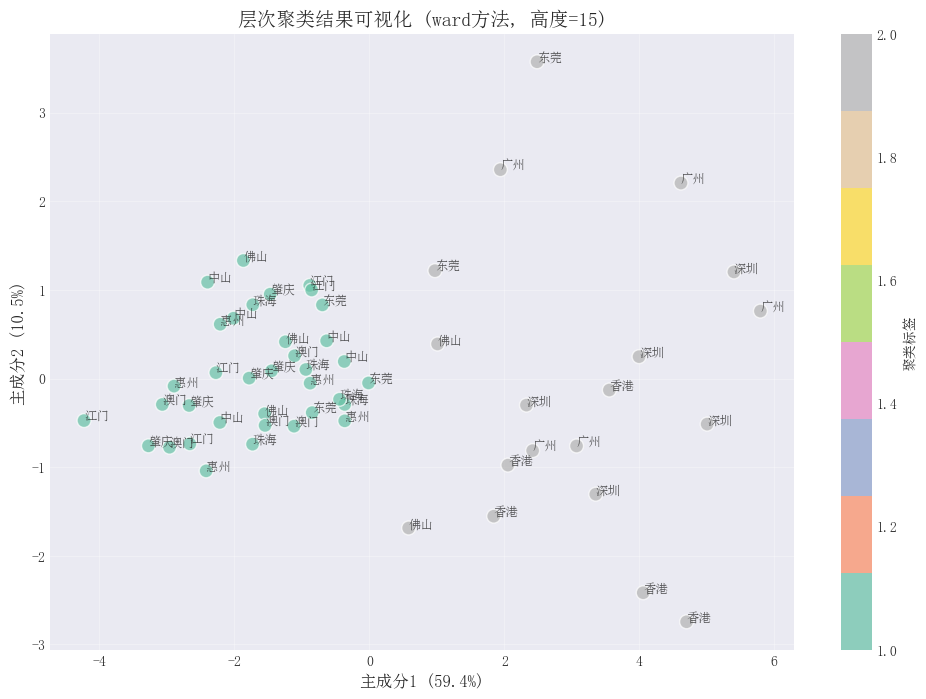

In [74]:
# ============================================
# 第十三章：层次聚类分析
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n🌳 层次聚类分析")
print("=" * 80)

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# 13.1 计算距离矩阵和连接矩阵
print("计算距离矩阵...")
distance_matrix = pdist(cluster_data_scaled_df, metric='euclidean')

# 使用不同连接方法
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_matrices = {}

for method in linkage_methods:
    linkage_matrices[method] = linkage(distance_matrix, method=method)
    print(f"  {method}方法连接矩阵计算完成")

# 13.2 绘制树状图
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, method in enumerate(linkage_methods):
    # 绘制树状图
    dendrogram(linkage_matrices[method],
              ax=axes[idx],
              orientation='top',
              labels=main_data['城市'].values,
              leaf_rotation=90,
              leaf_font_size=9,
              color_threshold=0.7*np.max(linkage_matrices[method][:, 2]))
    
    axes[idx].set_title(f'层次聚类树状图 - {method}方法', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('城市', fontsize=10)
    axes[idx].set_ylabel('距离', fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('层次聚类分析 - 不同连接方法对比', fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig('hierarchical_dendrograms.png', dpi=300, bbox_inches='tight')
plt.show()

# 13.3 使用ward方法进行聚类（通常效果较好）
print("\n使用ward方法进行层次聚类...")
# 根据树状图观察，选择切割高度
cut_height = 15  # 可以根据树状图调整
ward_labels = fcluster(linkage_matrices['ward'], t=cut_height, criterion='distance')

main_data['ward_cluster'] = ward_labels

print(f"层次聚类结果 (ward方法，切割高度={cut_height}):")
print("各簇样本数量:")
print(main_data['ward_cluster'].value_counts().sort_index())

# 13.4 对比K-means和层次聚类结果
print("\n聚类方法对比:")
print("K-means聚类 vs 层次聚类 (ward):")
comparison_df = pd.DataFrame({
    '城市': main_data['城市'],
    '年份': main_data['年份'],
    'K-means聚类': main_data['cluster_label'],
    '层次聚类': main_data['ward_cluster']
})

print(comparison_df.head(10))

# 计算两种方法的一致性
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(main_data['cluster_label'], main_data['ward_cluster'])
nmi = normalized_mutual_info_score(main_data['cluster_label'], main_data['ward_cluster'])

print(f"\n聚类一致性评估:")
print(f"调整兰德指数 (ARI): {ari:.4f}")
print(f"标准化互信息 (NMI): {nmi:.4f}")

# 13.5 可视化层次聚类结果
plt.figure(figsize=(12, 8))
scatter = plt.scatter(cluster_viz_df['PC1'], cluster_viz_df['PC2'], 
                     c=main_data['ward_cluster'], 
                     cmap='Set2',
                     s=100,
                     alpha=0.7,
                     edgecolors='white',
                     linewidth=1)

# 添加城市标签
for i, row in cluster_viz_df.iterrows():
    plt.annotate(row['City'], 
                (row['PC1'], row['PC2']),
                fontsize=9,
                alpha=0.8)

plt.xlabel(f'主成分1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'主成分2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title(f'层次聚类结果可视化 (ward方法, 高度={cut_height})', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='聚类标签')
plt.grid(True, alpha=0.3)
plt.savefig('hierarchical_clustering.png', dpi=300, bbox_inches='tight')
plt.show()


🎯 基于聚类的分类分析
特征数据形状: (55, 11)
目标标签分布: 
cluster_label
0    21
1    16
2    18
Name: count, dtype: int64
类别比例: 
cluster_label
0   0.3818
1   0.2909
2   0.3273
Name: proportion, dtype: float64

训练集大小: 38 样本
测试集大小: 17 样本
训练集类别分布: 
cluster_label
0    15
1    11
2    12
Name: count, dtype: int64
测试集类别分布: 
cluster_label
0    6
1    5
2    6
Name: count, dtype: int64

开始训练分类模型...
--------------------------------------------------------------------------------

训练 逻辑回归...
  准确率: 0.8824
  精确率: 0.9118
  召回率: 0.8824
  F1分数: 0.8848

  逻辑回归 分类报告:
              precision    recall  f1-score   support

          簇0       1.00      0.83      0.91         6
          簇1       1.00      0.80      0.89         5
          簇2       0.75      1.00      0.86         6

    accuracy                           0.88        17
   macro avg       0.92      0.88      0.89        17
weighted avg       0.91      0.88      0.88        17


训练 决策树...
  准确率: 0.8824
  精确率: 0.8908
  召回率: 0.8824
  F1分数: 0.8813

  决策树 分类报告:

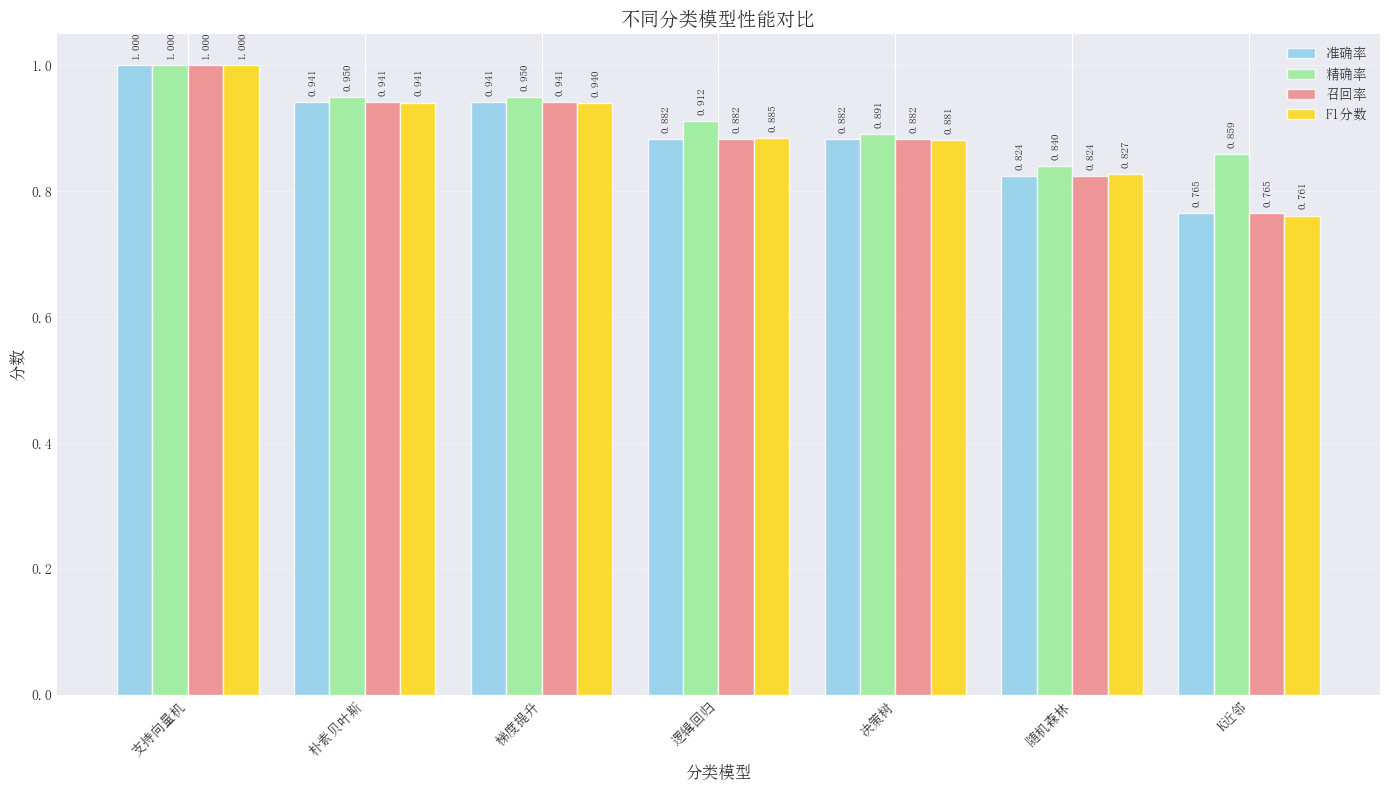


✅ 分类分析完成！


In [75]:
# ============================================
# 第十四章：基于聚类的分类分析
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n🎯 基于聚类的分类分析")
print("=" * 80)

# 14.1 准备分类数据
# 使用K-means聚类结果作为目标变量
X = cluster_data_scaled_df.copy()  # 特征数据
y = main_data['cluster_label']    # 目标标签

print(f"特征数据形状: {X.shape}")
print(f"目标标签分布: \n{y.value_counts().sort_index()}")
print(f"类别比例: \n{y.value_counts(normalize=True).sort_index().round(4)}")

# 14.2 数据分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\n训练集大小: {X_train.shape[0]} 样本")
print(f"测试集大小: {X_test.shape[0]} 样本")
print(f"训练集类别分布: \n{y_train.value_counts().sort_index()}")
print(f"测试集类别分布: \n{y_test.value_counts().sort_index()}")

# 14.3 训练多种分类模型
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
# 移除xgboost导入

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# 定义要测试的分类器（移除了XGBoost）
classifiers = {
    '逻辑回归': LogisticRegression(random_state=42, max_iter=1000),
    '决策树': DecisionTreeClassifier(random_state=42),
    '随机森林': RandomForestClassifier(random_state=42, n_estimators=100),
    '支持向量机': SVC(random_state=42, probability=True),
    'K近邻': KNeighborsClassifier(n_neighbors=5),
    '朴素贝叶斯': GaussianNB(),
    '梯度提升': GradientBoostingClassifier(random_state=42),
}

# 存储结果
results = {}

print("\n开始训练分类模型...")
print("-" * 80)

for name, clf in classifiers.items():
    print(f"\n训练 {name}...")
    
    # 训练模型
    clf.fit(X_train, y_train)
    
    # 预测
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test) if hasattr(clf, "predict_proba") else None
    
    # 计算评估指标
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # 存储结果
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'model': clf,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  准确率: {accuracy:.4f}")
    print(f"  精确率: {precision:.4f}")
    print(f"  召回率: {recall:.4f}")
    print(f"  F1分数: {f1:.4f}")
    
    # 显示分类报告
    print(f"\n  {name} 分类报告:")
    print(classification_report(y_test, y_pred, target_names=['簇0', '簇1', '簇2']))

# 14.4 模型性能比较
print("\n" + "="*80)
print("模型性能比较")
print("="*80)

# 创建性能比较DataFrame
performance_df = pd.DataFrame({
    '模型': list(results.keys()),
    '准确率': [results[name]['accuracy'] for name in results.keys()],
    '精确率': [results[name]['precision'] for name in results.keys()],
    '召回率': [results[name]['recall'] for name in results.keys()],
    'F1分数': [results[name]['f1'] for name in results.keys()]
})

# 排序
performance_df = performance_df.sort_values('F1分数', ascending=False)

print(performance_df.to_string(index=False))

# 14.5 可视化模型性能
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 8))
x = np.arange(len(results))
width = 0.2

models = performance_df['模型'].tolist()
accuracies = performance_df['准确率'].tolist()
precisions = performance_df['精确率'].tolist()
recalls = performance_df['召回率'].tolist()
f1_scores = performance_df['F1分数'].tolist()

plt.bar(x - 1.5*width, accuracies, width, label='准确率', alpha=0.8, color='skyblue')
plt.bar(x - 0.5*width, precisions, width, label='精确率', alpha=0.8, color='lightgreen')
plt.bar(x + 0.5*width, recalls, width, label='召回率', alpha=0.8, color='lightcoral')
plt.bar(x + 1.5*width, f1_scores, width, label='F1分数', alpha=0.8, color='gold')

plt.xlabel('分类模型', fontsize=12)
plt.ylabel('分数', fontsize=12)
plt.title('不同分类模型性能对比', fontsize=14, fontweight='bold')
plt.xticks(x, models, rotation=45, ha='right')
plt.ylim([0, 1.05])
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, axis='y')

# 添加数值标签
for i in range(len(models)):
    plt.text(i - 1.5*width, accuracies[i] + 0.01, f'{accuracies[i]:.3f}', 
             ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i - 0.5*width, precisions[i] + 0.01, f'{precisions[i]:.3f}', 
             ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + 0.5*width, recalls[i] + 0.01, f'{recalls[i]:.3f}', 
             ha='center', va='bottom', fontsize=8, rotation=90)
    plt.text(i + 1.5*width, f1_scores[i] + 0.01, f'{f1_scores[i]:.3f}', 
             ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.savefig('classification_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ 分类分析完成！")


🏆 最佳模型深入分析
最佳模型: 支持向量机

特征重要性分析:


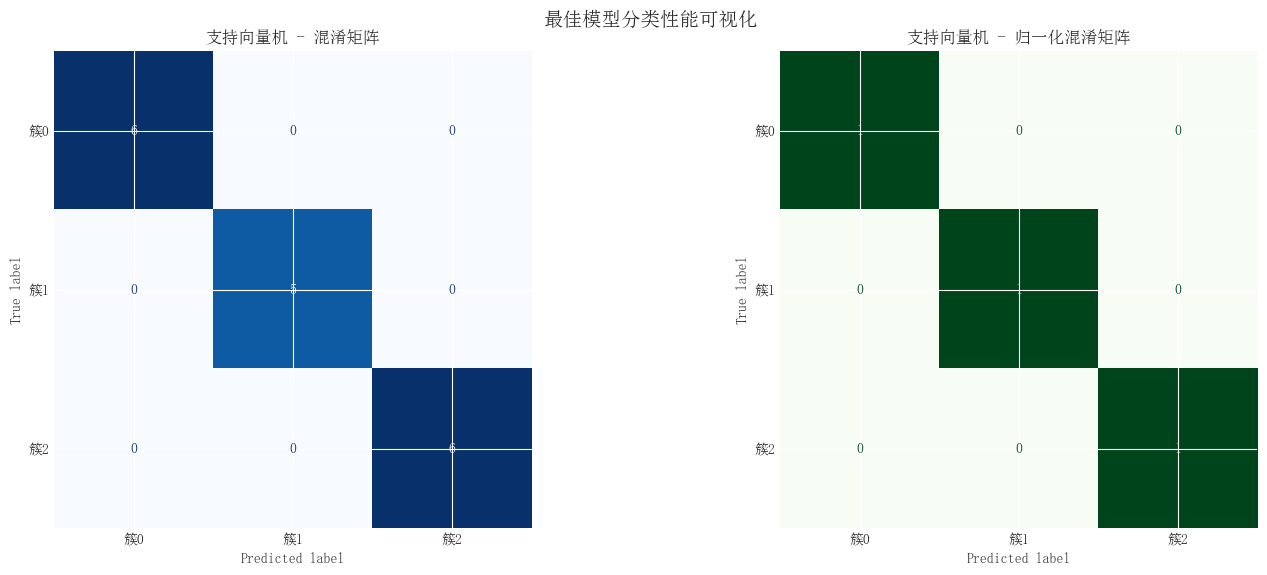


决策边界可视化...


In [76]:
# ============================================
# 第十五章：最佳模型深入分析
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n🏆 最佳模型深入分析")
print("=" * 80)

# 15.1 选择最佳模型（基于F1分数）
best_model_name = performance_df.iloc[0]['模型']
best_model = results[best_model_name]['model']
print(f"最佳模型: {best_model_name}")

# 15.2 特征重要性分析
print("\n特征重要性分析:")

if hasattr(best_model, 'feature_importances_'):
    # 树模型特征重要性
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        '特征': clustering_features,
        '重要性': importances
    }).sort_values('重要性', ascending=False)
    
    print(feature_importance_df)
    
    # 可视化特征重要性
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(feature_importance_df)), feature_importance_df['重要性'].values)
    plt.yticks(range(len(feature_importance_df)), feature_importance_df['特征'].values)
    plt.xlabel('特征重要性', fontsize=12)
    plt.title(f'{best_model_name} - 特征重要性排序', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig(f'{best_model_name}_feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

elif hasattr(best_model, 'coef_'):
    # 线性模型系数
    if len(best_model.coef_.shape) > 1:
        # 多分类情况
        for i in range(best_model.coef_.shape[0]):
            coef_df = pd.DataFrame({
                '特征': clustering_features,
                f'类别{i}_系数': best_model.coef_[i]
            }).sort_values(f'类别{i}_系数', key=abs, ascending=False)
            print(f"\n类别{i}的系数:")
            print(coef_df.head(10))
    else:
        # 二分类情况
        coef_df = pd.DataFrame({
            '特征': clustering_features,
            '系数': best_model.coef_[0]
        }).sort_values('系数', key=abs, ascending=False)
        print(coef_df)

# 15.3 混淆矩阵可视化
from sklearn.metrics import ConfusionMatrixDisplay

y_pred_best = results[best_model_name]['y_pred']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 混淆矩阵
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_best,
    display_labels=['簇0', '簇1', '簇2'],
    cmap='Blues',
    ax=axes[0],
    colorbar=False
)
axes[0].set_title(f'{best_model_name} - 混淆矩阵', fontsize=12, fontweight='bold')

# 归一化混淆矩阵
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_best,
    display_labels=['簇0', '簇1', '簇2'],
    normalize='true',
    cmap='Greens',
    ax=axes[1],
    colorbar=False
)
axes[1].set_title(f'{best_model_name} - 归一化混淆矩阵', fontsize=12, fontweight='bold')

plt.suptitle('最佳模型分类性能可视化', fontsize=14, fontweight='bold', y=0.95)
plt.tight_layout()
plt.savefig(f'{best_model_name}_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 15.4 决策边界可视化（使用前两个主成分）
print("\n决策边界可视化...")
from sklearn.inspection import DecisionBoundaryDisplay

# 使用前两个特征进行可视化（或使用PCA）
X_2d = X_train.iloc[:, :2]  # 使用前两个特征
X_test_2d = X_test.iloc[:, :2]

# 重新训练一个简化的模型用于可视化
if best_model_name in ['决策树', '随机森林', '梯度提升', 'XGBoost']:
    # 对于树模型，使用前两个特征训练
    simple_model = type(best_model)(random_state=42)
    simple_model.fit(X_2d, y_train)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # 绘制决策边界
    DecisionBoundaryDisplay.from_estimator(
        simple_model,
        X_2d,
        response_method="predict",
        ax=ax,
        alpha=0.5,
        cmap='Set3'
    )
    
    # 绘制训练数据点
    scatter = ax.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], 
                        c=y_train, 
                        edgecolors='k',
                        cmap='viridis',
                        s=80)
    
    ax.set_xlabel(X_2d.columns[0], fontsize=12)
    ax.set_ylabel(X_2d.columns[1], fontsize=12)
    ax.set_title(f'{best_model_name} - 决策边界可视化 (前两个特征)', 
                fontsize=14, fontweight='bold')
    ax.legend(*scatter.legend_elements(), title="类别")
    plt.tight_layout()
    plt.savefig(f'{best_model_name}_decision_boundary.png', dpi=300, bbox_inches='tight')
    plt.show()


📈 时间序列分析与预测
跨境数据传输总量的时间序列数据:
城市         东莞       中山       佛山        广州       惠州       江门       深圳       澳门  \
年份                                                                              
2019 454.2500 652.3800 281.7200  622.7400 252.8000 106.5000 166.9300 247.7700   
2020 366.1700 298.4400 300.9200  839.7800 214.7000 264.6300 758.5600 278.1300   
2021 442.8100 117.2700 158.9100  768.4900 152.9400 325.5100 502.9500 202.8300   
2022 689.6400 371.6100 523.3300  630.8500 247.0900 218.0800 361.4200 422.3400   
2023 438.0100 392.9200 376.8300 1220.6000 306.3700 276.0100 406.1200 319.7700   

城市         珠海       肇庆        香港  
年份                                
2019 228.8300 190.9600  535.8100  
2020 136.1000 227.4600  307.3800  
2021 159.1000 487.3200  358.7100  
2022 382.3900 263.8000 1056.7500  
2023 389.5800 466.9700  692.8200  


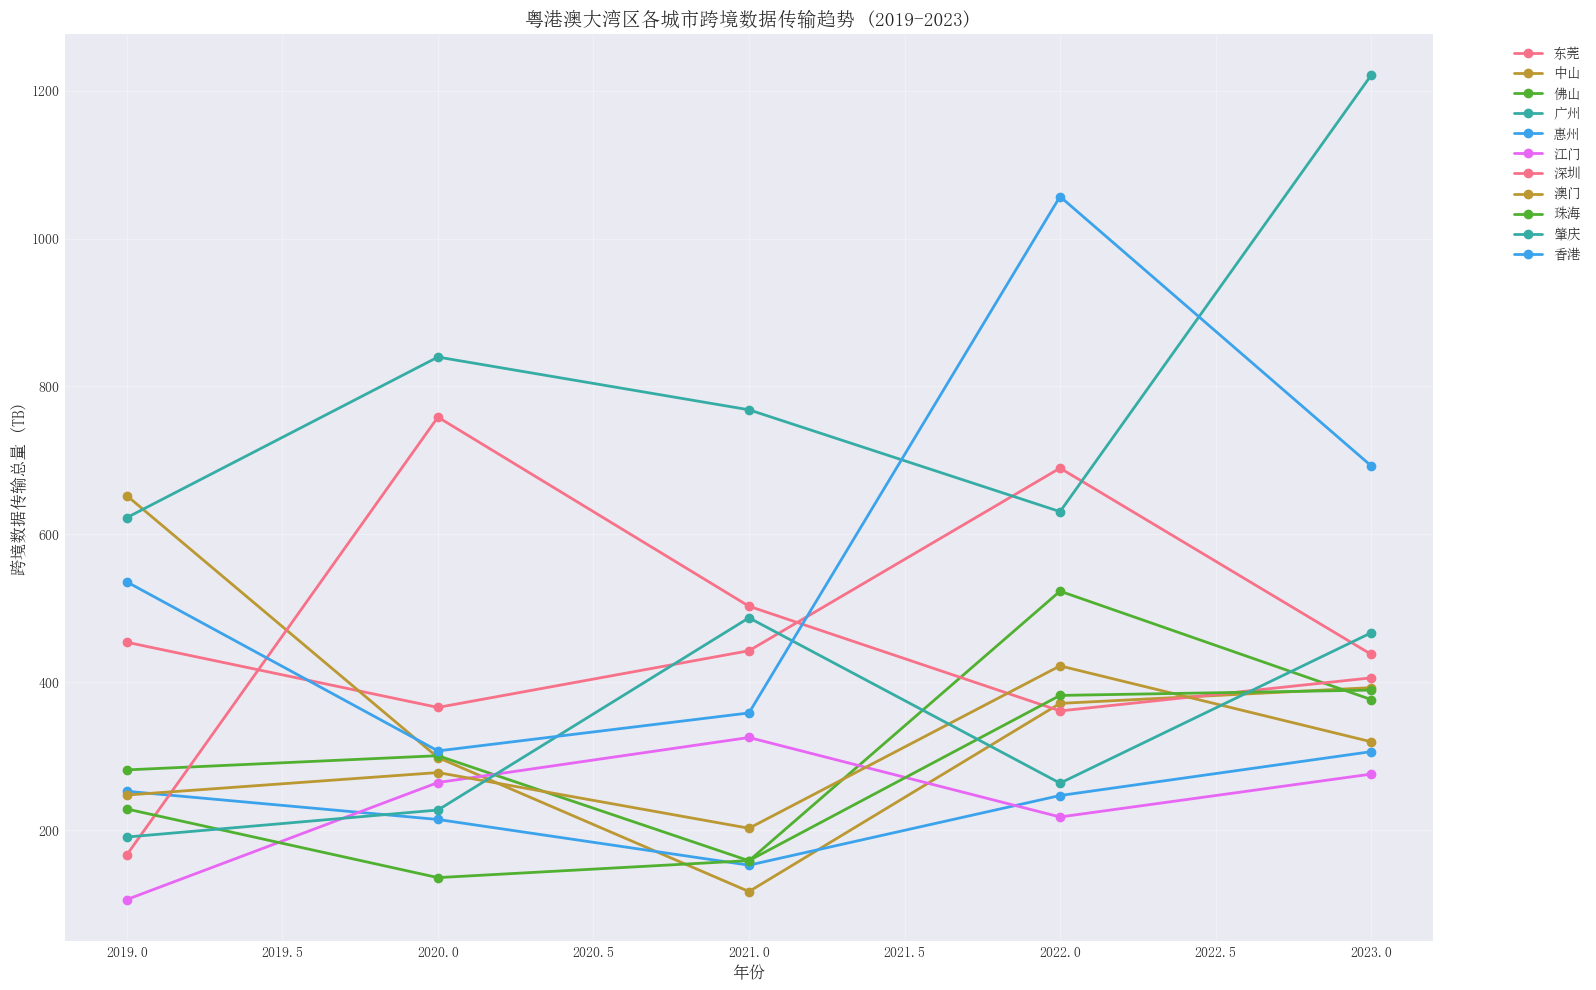


年度增长率分析:
年度同比增长率 (%):
城市         东莞       中山       佛山       广州       惠州       江门       深圳       澳门  \
年份                                                                             
2019      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2020 -19.3900 -54.2500   6.8100  34.8500 -15.0700 148.4800 354.4300  12.2500   
2021  20.9300 -60.7100 -47.1900  -8.4900 -28.7700  23.0000 -33.7000 -27.0700   
2022  55.7400 216.8900 229.3200 -17.9100  61.5600 -33.0000 -28.1400 108.2200   
2023 -36.4900   5.7300 -27.9900  93.4900  23.9900  26.5700  12.3700 -24.2900   

城市         珠海       肇庆       香港  
年份                               
2019      NaN      NaN      NaN  
2020 -40.5200  19.1100 -42.6300  
2021  16.9000 114.2400  16.7000  
2022 140.3500 -45.8700 194.6000  
2023   1.8800  77.0200 -34.4400  

未来趋势预测 (2024-2025):
东莞: R² = 0.1395, 预测2024: 565.5TB, 预测2025: 594.6TB
中山: R² = 0.1332, 预测2024: 232.8TB, 预测2025: 188.2TB
佛山: R² = 0.2365, 预测2024: 452.1TB, 预测2025: 493.4TB
广州: R² 

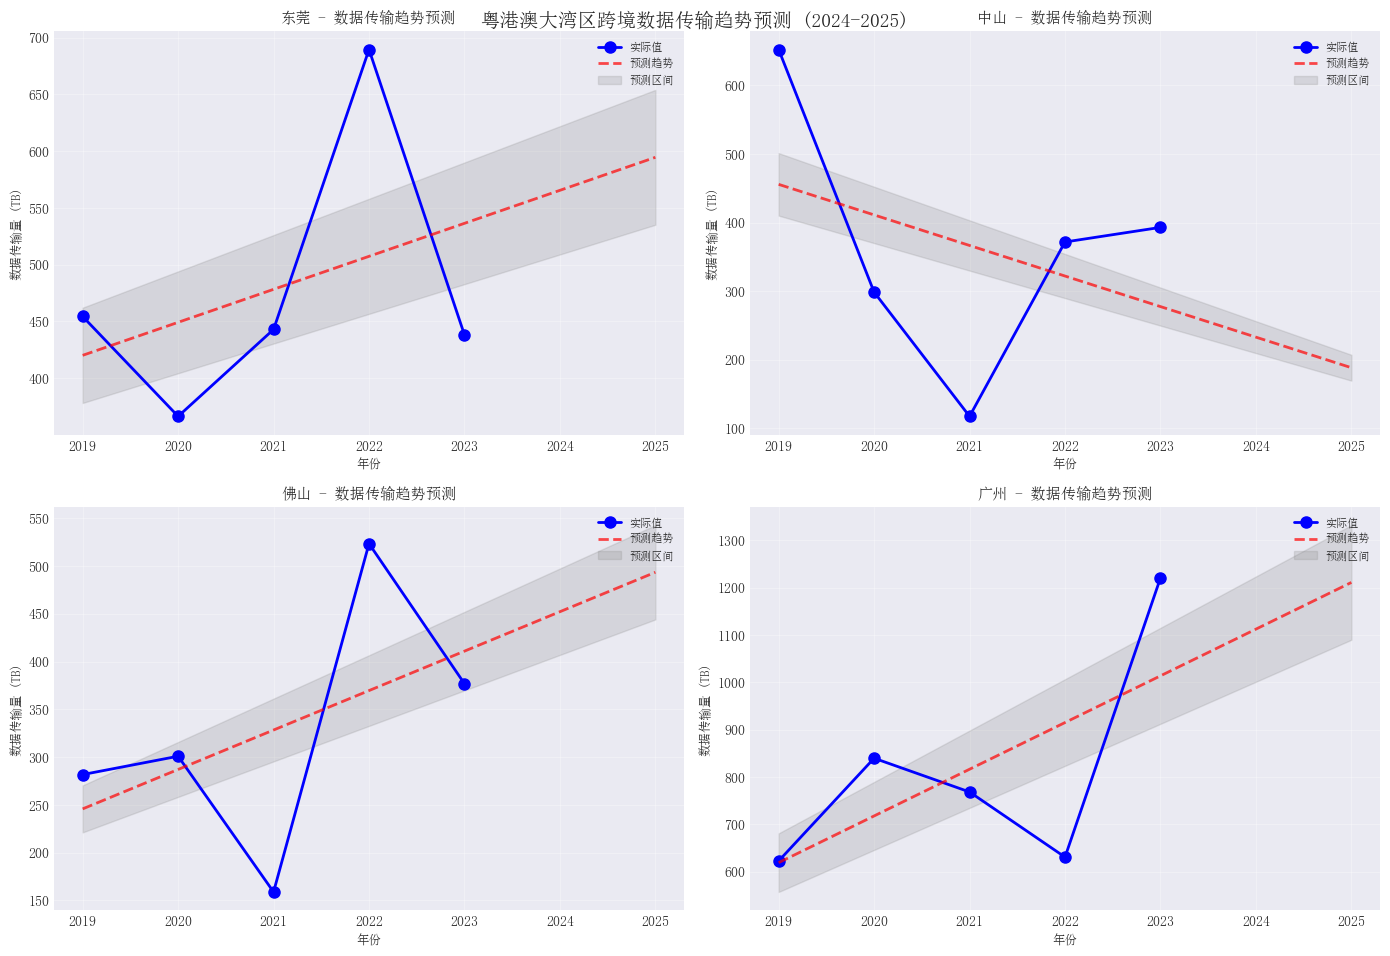

In [77]:
# ============================================
# 第十六章：时间序列分析与预测
# ============================================

plt.rcParams['font.sans-serif'] = ['SimSun']  # 宋体
plt.rcParams['axes.unicode_minus'] = False

print("\n📈 时间序列分析与预测")
print("=" * 80)

# 16.1 准备时间序列数据
# 按城市和年份分析趋势
if '年份' in main_data.columns and '城市' in main_data.columns:
    # 创建时间序列分析数据
    time_series_data = main_data.pivot_table(
        index='年份',
        columns='城市',
        values='跨境数据传输总量_TB'
    )
    
    print("跨境数据传输总量的时间序列数据:")
    print(time_series_data.round(2))
    
    # 16.2 绘制时间序列趋势
    plt.figure(figsize=(16, 10))
    
    # 绘制各城市趋势
    for city in time_series_data.columns:
        plt.plot(time_series_data.index, time_series_data[city], 
                marker='o', linewidth=2, label=city, markersize=6)
    
    plt.xlabel('年份', fontsize=12)
    plt.ylabel('跨境数据传输总量 (TB)', fontsize=12)
    plt.title('粤港澳大湾区各城市跨境数据传输趋势 (2019-2023)', 
             fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('data_flow_trend.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 16.3 计算年度增长率
    print("\n年度增长率分析:")
    growth_rates = time_series_data.pct_change() * 100
    print("年度同比增长率 (%):")
    print(growth_rates.round(2))
    
    # 16.4 预测未来趋势（简单线性外推）
    print("\n未来趋势预测 (2024-2025):")
    from sklearn.linear_model import LinearRegression
    
    predictions = {}
    years_to_predict = [2024, 2025]
    
    for city in time_series_data.columns:
        # 准备数据
        X = np.array(time_series_data.index).reshape(-1, 1)
        y = time_series_data[city].values
        
        # 训练线性回归模型
        model = LinearRegression()
        model.fit(X, y)
        
        # 预测未来值
        future_years = np.array(years_to_predict).reshape(-1, 1)
        future_values = model.predict(future_years)
        
        predictions[city] = future_values
        
        # 计算R²分数
        r2 = model.score(X, y)
        print(f"{city}: R² = {r2:.4f}, 预测2024: {future_values[0]:.1f}TB, 预测2025: {future_values[1]:.1f}TB")
    
    # 16.5 绘制预测结果
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    selected_cities = time_series_data.columns[:4]  # 选择前4个城市
    
    for idx, city in enumerate(selected_cities):
        if idx < 4:
            X = np.array(time_series_data.index).reshape(-1, 1)
            y = time_series_data[city].values
            
            model = LinearRegression()
            model.fit(X, y)
            
            # 扩展时间范围
            extended_years = np.arange(2019, 2026).reshape(-1, 1)
            predictions_all = model.predict(extended_years)
            
            # 绘制
            axes[idx].plot(time_series_data.index, y, 'bo-', 
                          linewidth=2, markersize=8, label='实际值')
            axes[idx].plot(extended_years, predictions_all, 'r--', 
                          linewidth=2, alpha=0.7, label='预测趋势')
            axes[idx].fill_between(extended_years.flatten(), 
                                  predictions_all * 0.9, predictions_all * 1.1,
                                  alpha=0.2, color='gray', label='预测区间')
            
            axes[idx].set_title(f'{city} - 数据传输趋势预测', fontsize=11, fontweight='bold')
            axes[idx].set_xlabel('年份', fontsize=9)
            axes[idx].set_ylabel('数据传输量 (TB)', fontsize=9)
            axes[idx].legend(fontsize=8)
            axes[idx].grid(True, alpha=0.3)
    
    plt.suptitle('粤港澳大湾区跨境数据传输趋势预测 (2024-2025)', 
                fontsize=14, fontweight='bold', y=0.95)
    plt.tight_layout()
    plt.savefig('data_flow_prediction.png', dpi=300, bbox_inches='tight')
    plt.show()